### PREDICTING  REMAINING USEFULL LIFE OF JET ENGINES

In [1]:
 # import dependancies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # setting up columns  
column_names = ['engine_id', 'cycle'] + \
               [f'operational_setting_{i}' for i in range(1, 4)] + \
               [f'sensor_measurement_{i}' for i in range(1, 22)]

 # Loading the data
train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HomePC\AppData\Local\Temp\ipykernel_15536\2323301065.py:7: SyntaxWarning: invalid escape sequence '\s'
  train_df = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)


In [3]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [4]:
display(train_df.head(5))
print(train_df.shape)
train_df.info()
display(train_df.describe().T)

,engine_id,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


(20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              20631 non-null  int64  
 1   cycle                  20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-null  flo

,count,mean,std,min,25%,50%,75%,max
engine_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_measurement_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_measurement_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_measurement_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_measurement_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


From the output we can see that the dataframe contains 20,621 rows and 26 columns , two of the columns Engine Id and the cycle are integers while the other columns are floats.

In [5]:
 # Getting the number of unique values 
display(train_df.nunique())

engine_id                 100
cycle                     362
operational_setting_1     158
operational_setting_2      13
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      310
sensor_measurement_3     3012
sensor_measurement_4     4051
sensor_measurement_5        1
sensor_measurement_6        2
sensor_measurement_7      513
sensor_measurement_8       53
sensor_measurement_9     6403
sensor_measurement_10       1
sensor_measurement_11     159
sensor_measurement_12     427
sensor_measurement_13      56
sensor_measurement_14    6078
sensor_measurement_15    1918
sensor_measurement_16       1
sensor_measurement_17      13
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     120
sensor_measurement_21    4745
dtype: int64

In [6]:
# getting the null values 
display(train_df.isnull().sum())

# Getting duplicated values
display(train_df.duplicated().sum())

engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64

np.int64(0)

From the output we can see that there are no duplicated values nor are there any null values in.we will then check the number of cycles each engine goes through untill failure 

In [7]:
 # Getting max cycle 
max_cycles = train_df.groupby('engine_id')['cycle'].max().to_frame()

display(max_cycles.sort_values(by= 'cycle',ascending=False))
display(max_cycles.describe())


,cycle
engine_id,
69,362
92,341
96,336
67,313
83,293
...,...
58,147
70,137
57,137


,cycle
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


From the output we can see that engine 69 has the highest number of cycles at 362 while egine 39 has the lowest number of cycles at 128.we can see that the mean maximum cycle is 206.31  while the standard deviation 46.34

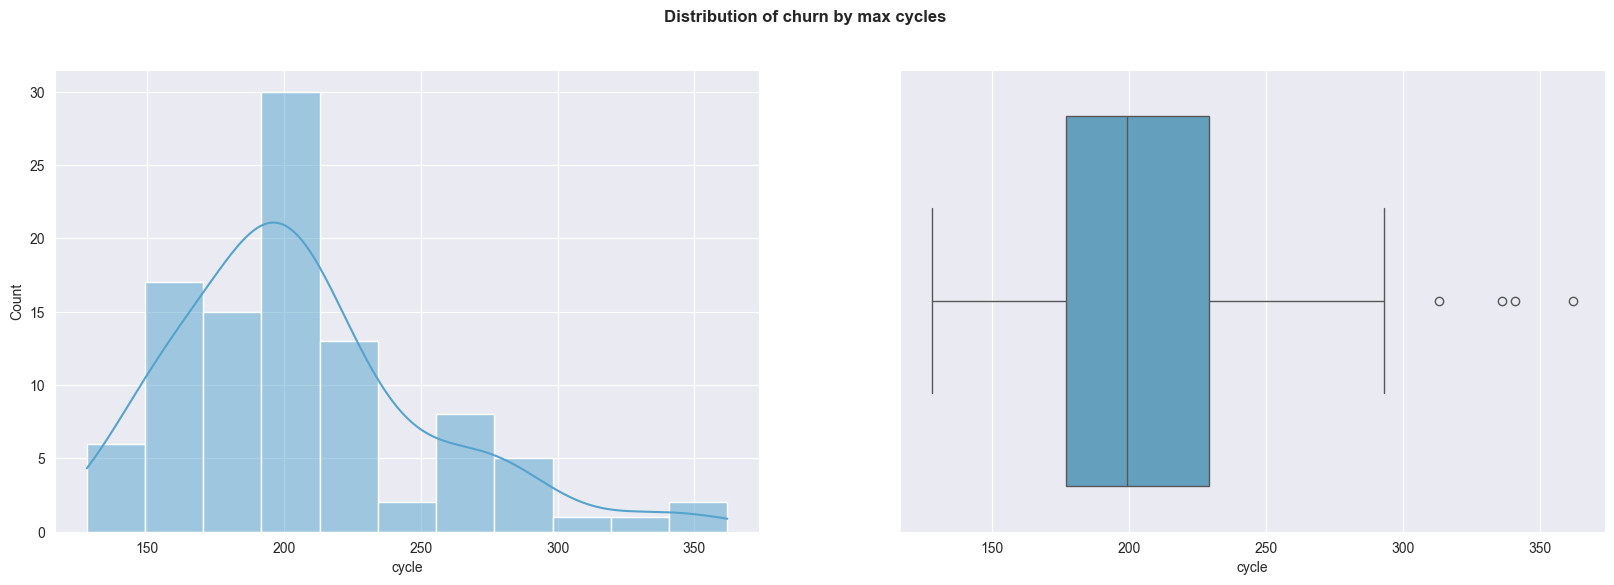

In [16]:
 # Plotting a histogram of cycle of the data
fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 6 ) )
sns.histplot( x = 'cycle' ,  data = max_cycles , kde=True , ax = ax[0])
sns.boxplot( x = 'cycle' , data = max_cycles , ax = ax[1])

plt.suptitle('Distribution of churn by max cycles' , fontweight = 'bold')

plt.show()

We can see that the distribution is leftly skewed where most engines have a cycle of 200.from the box plot we can see existance of outliers that have more than 300 cycles 

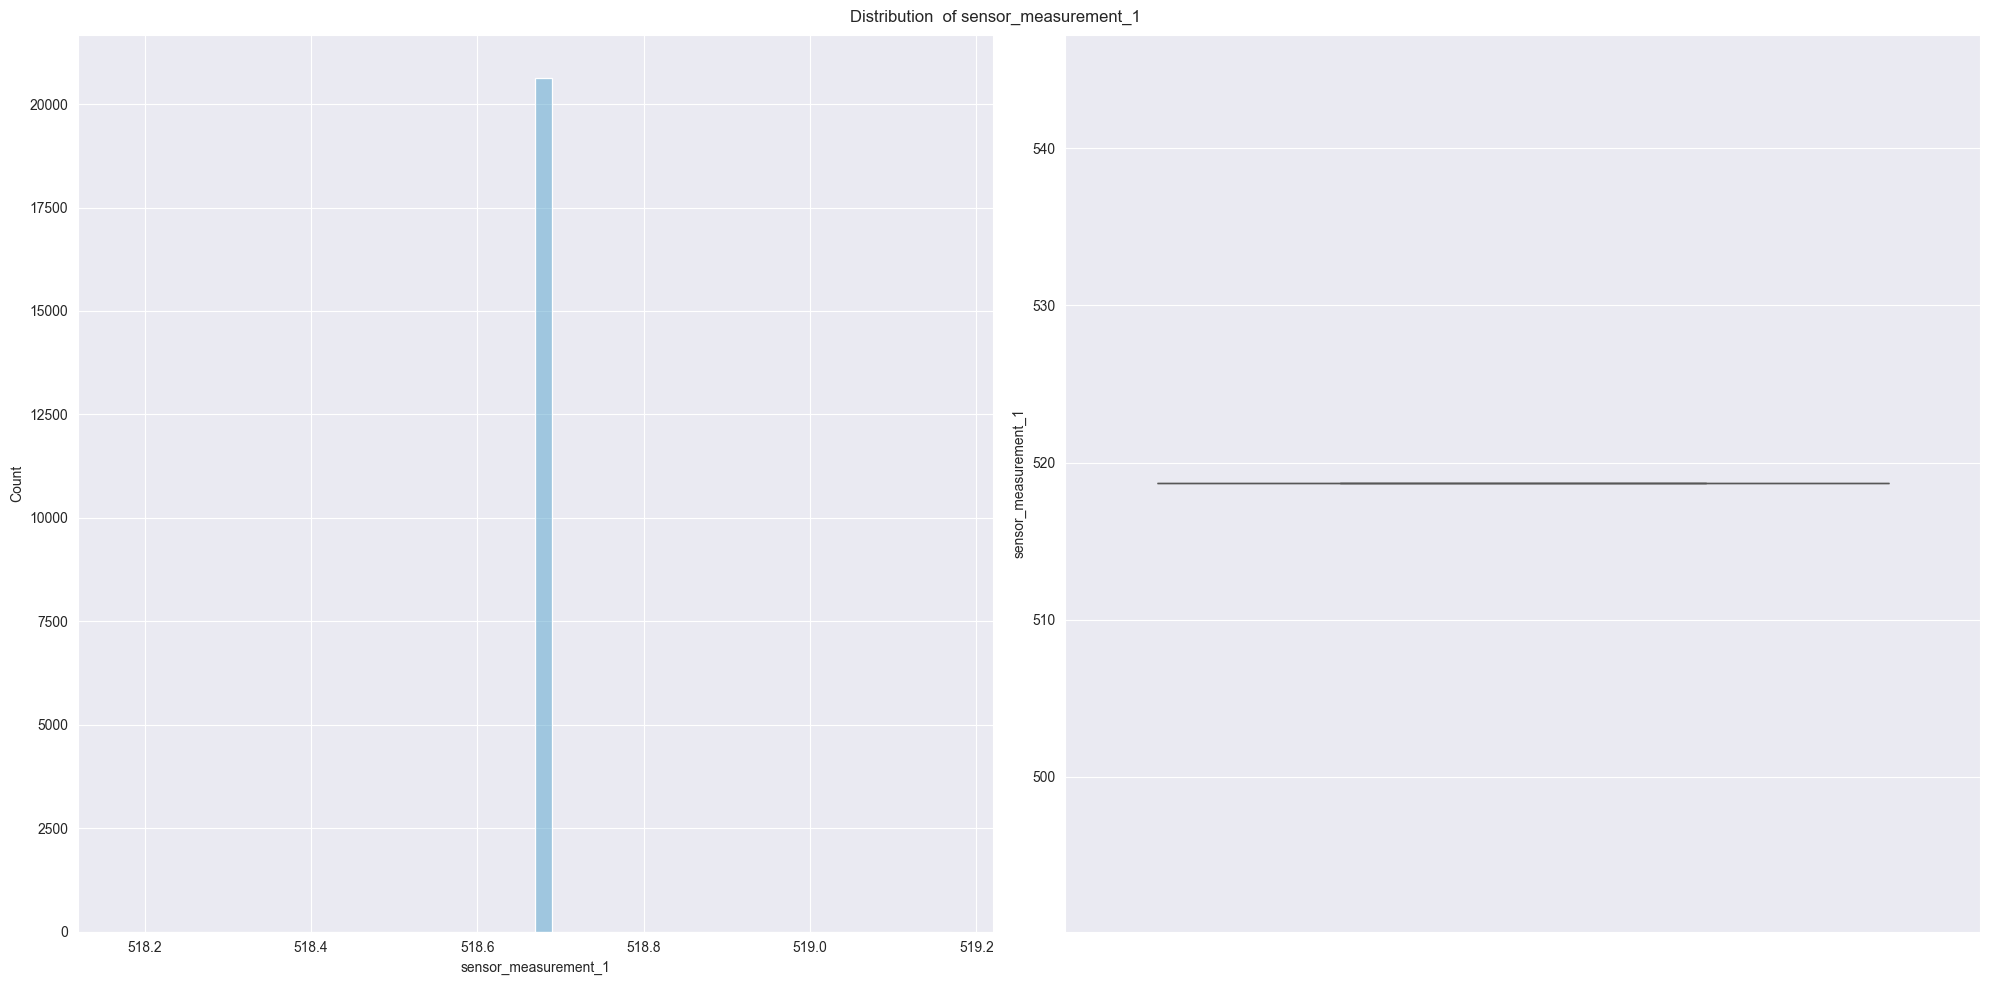

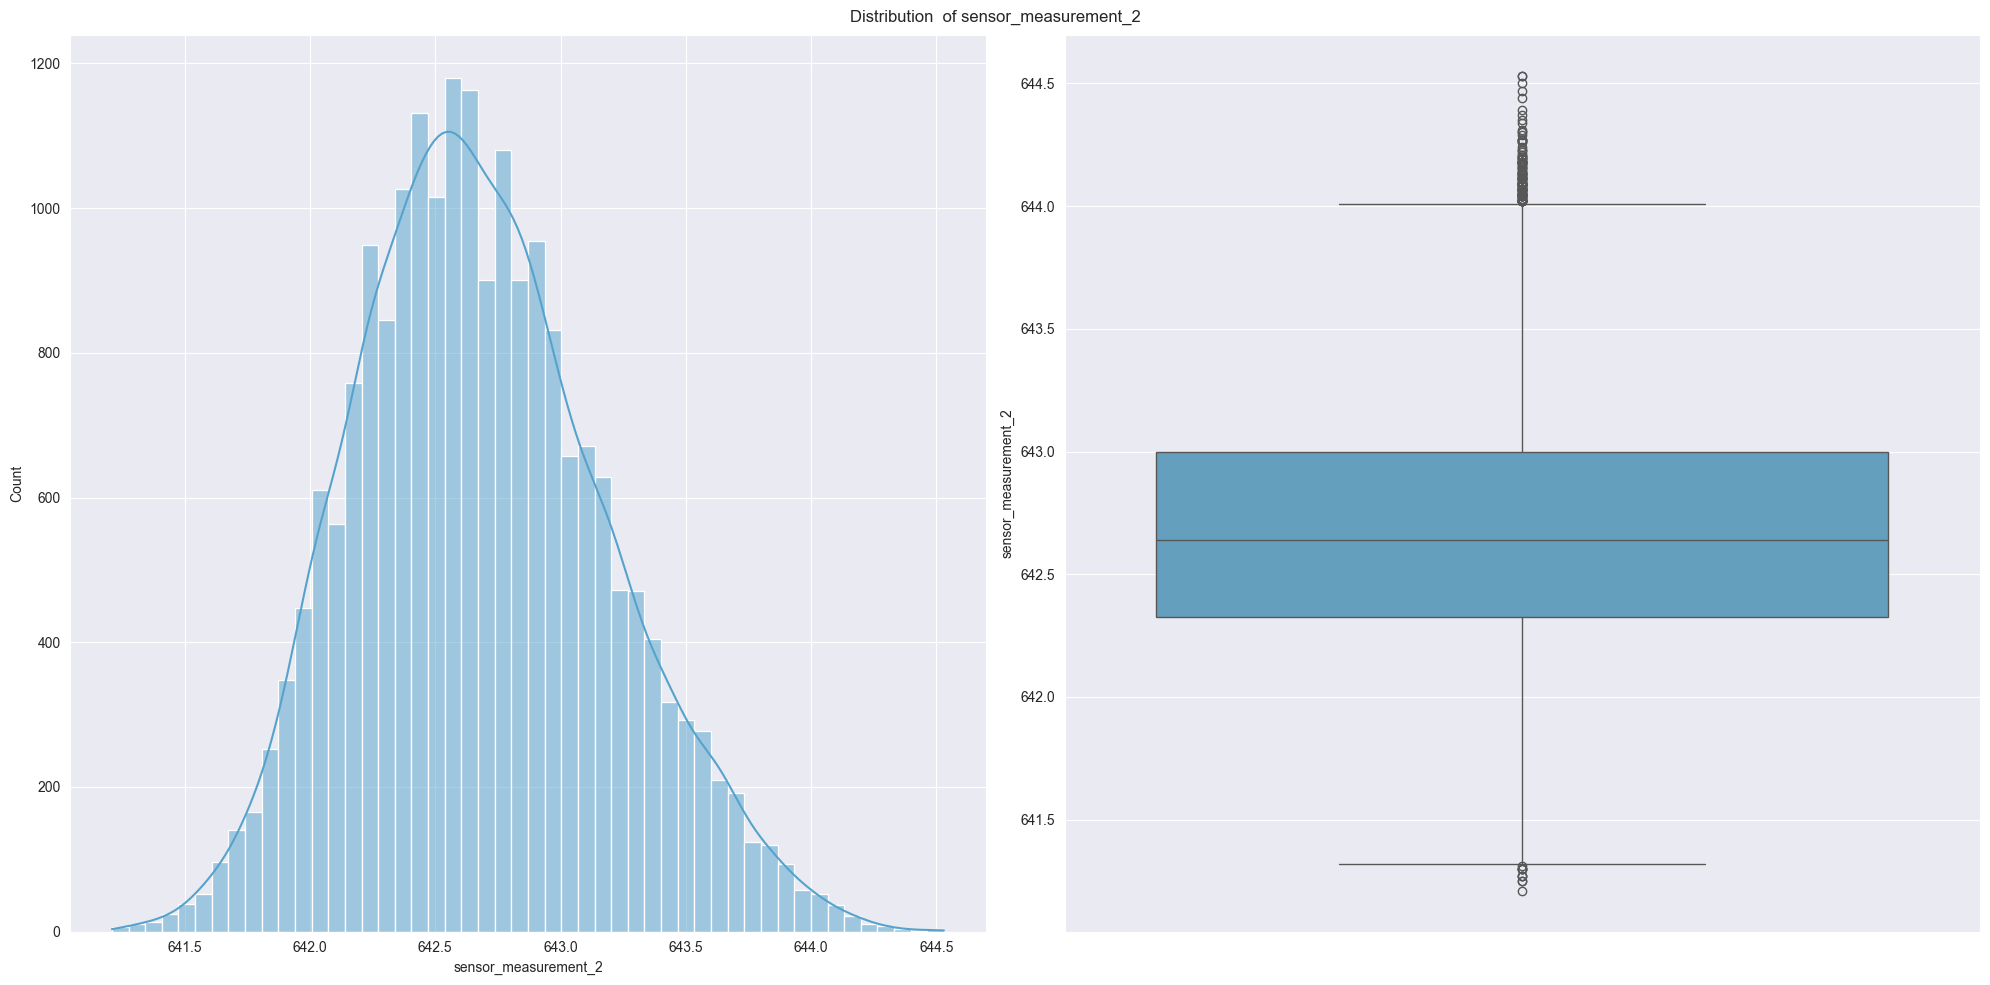

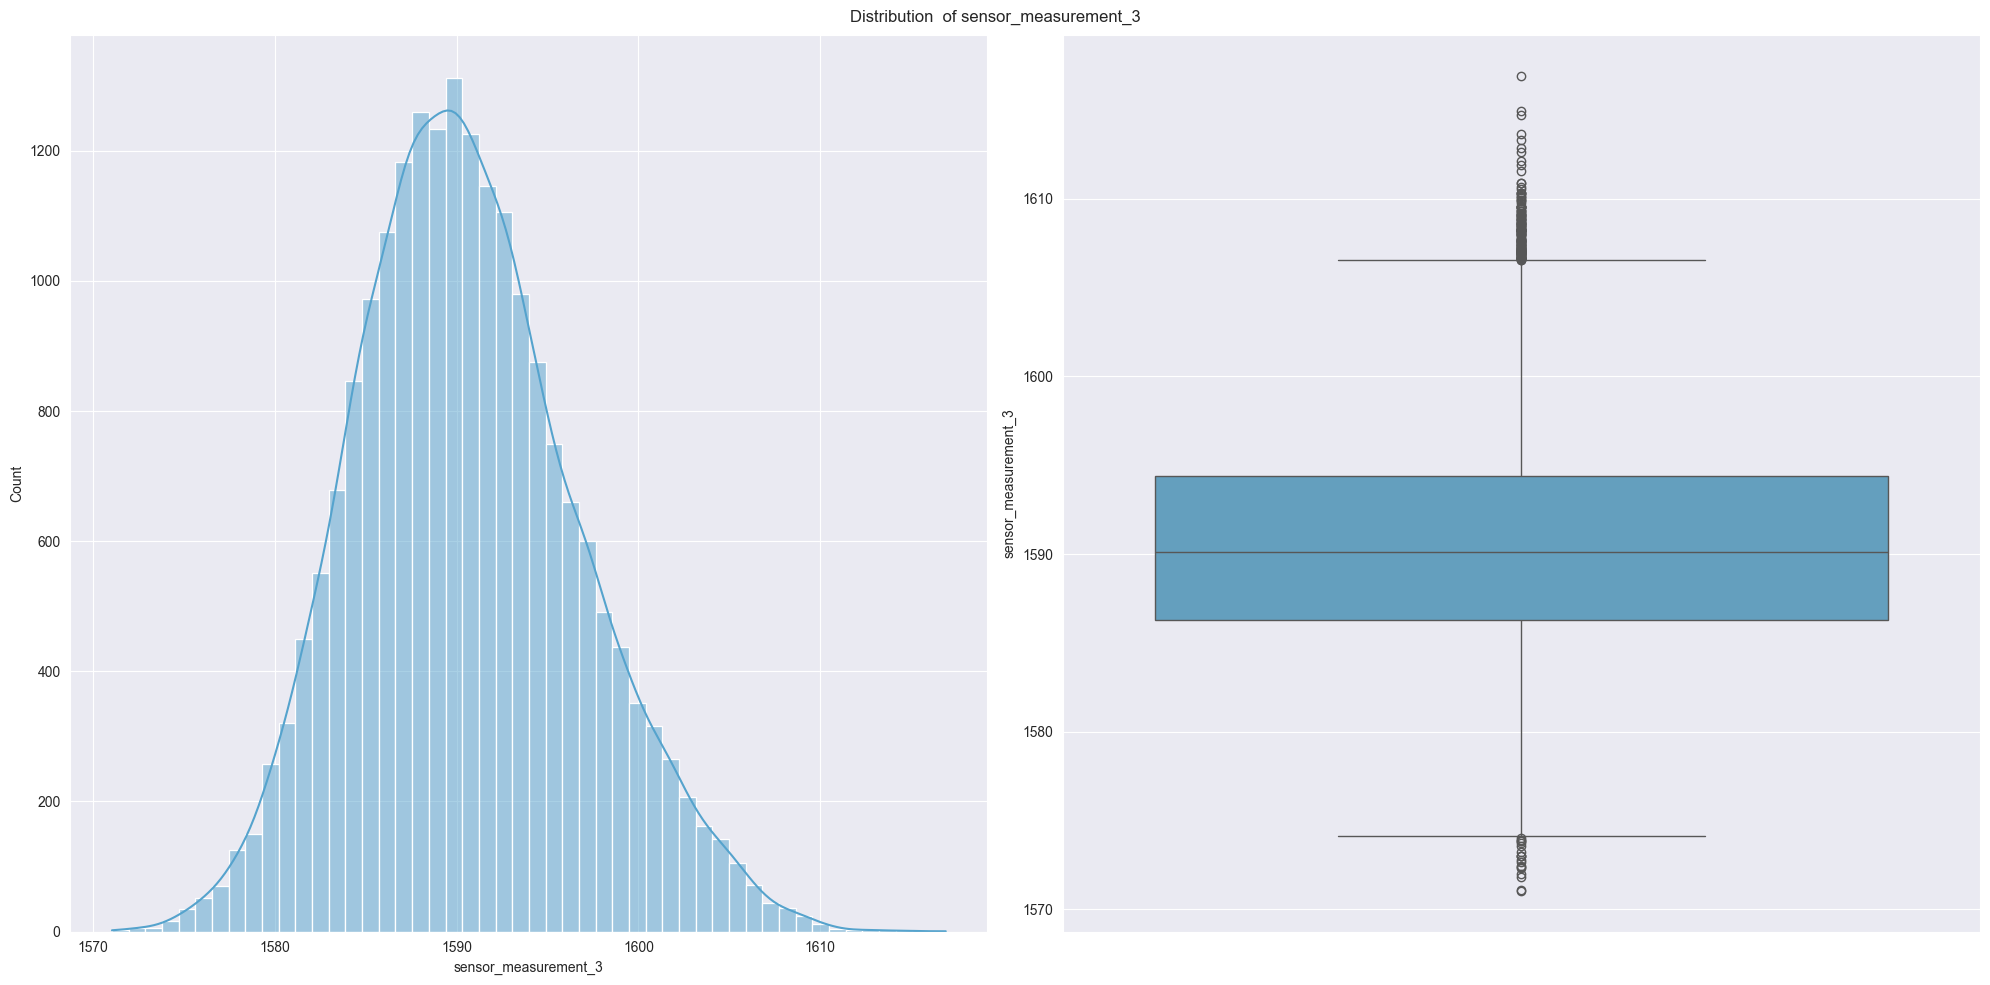

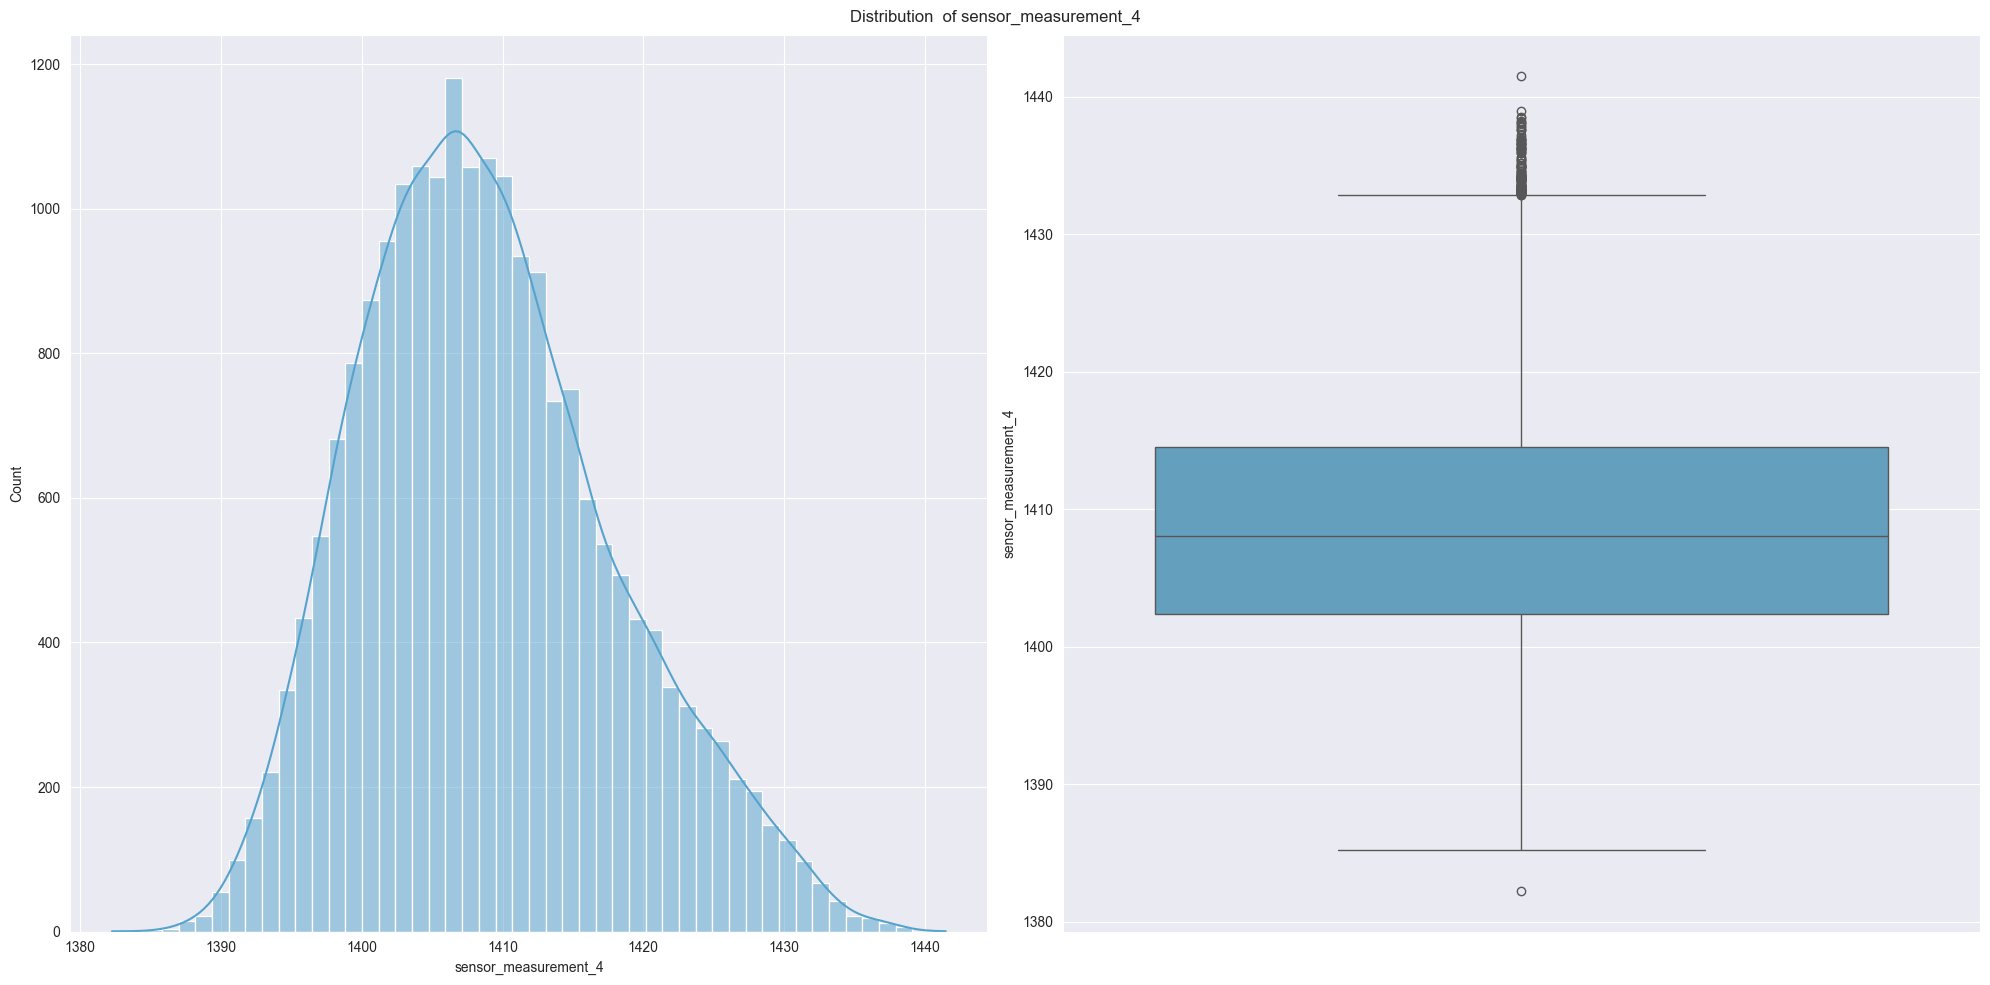

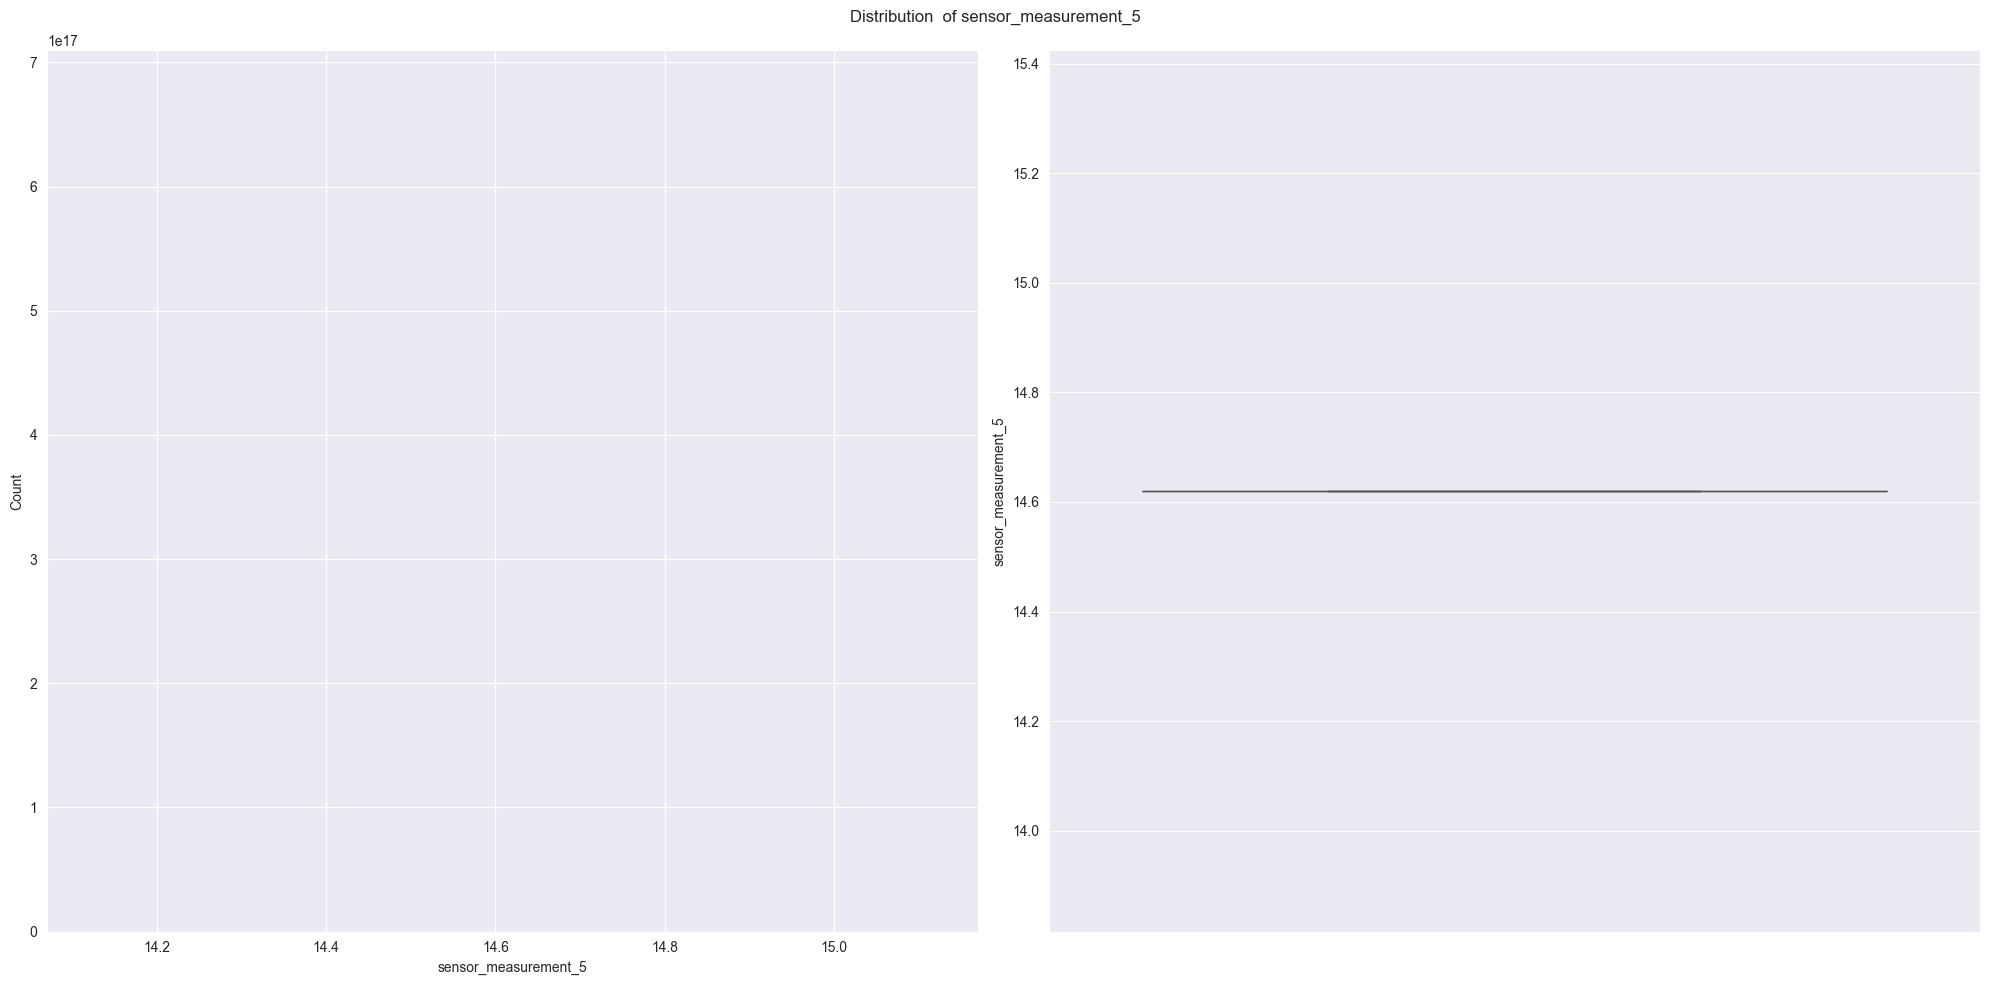

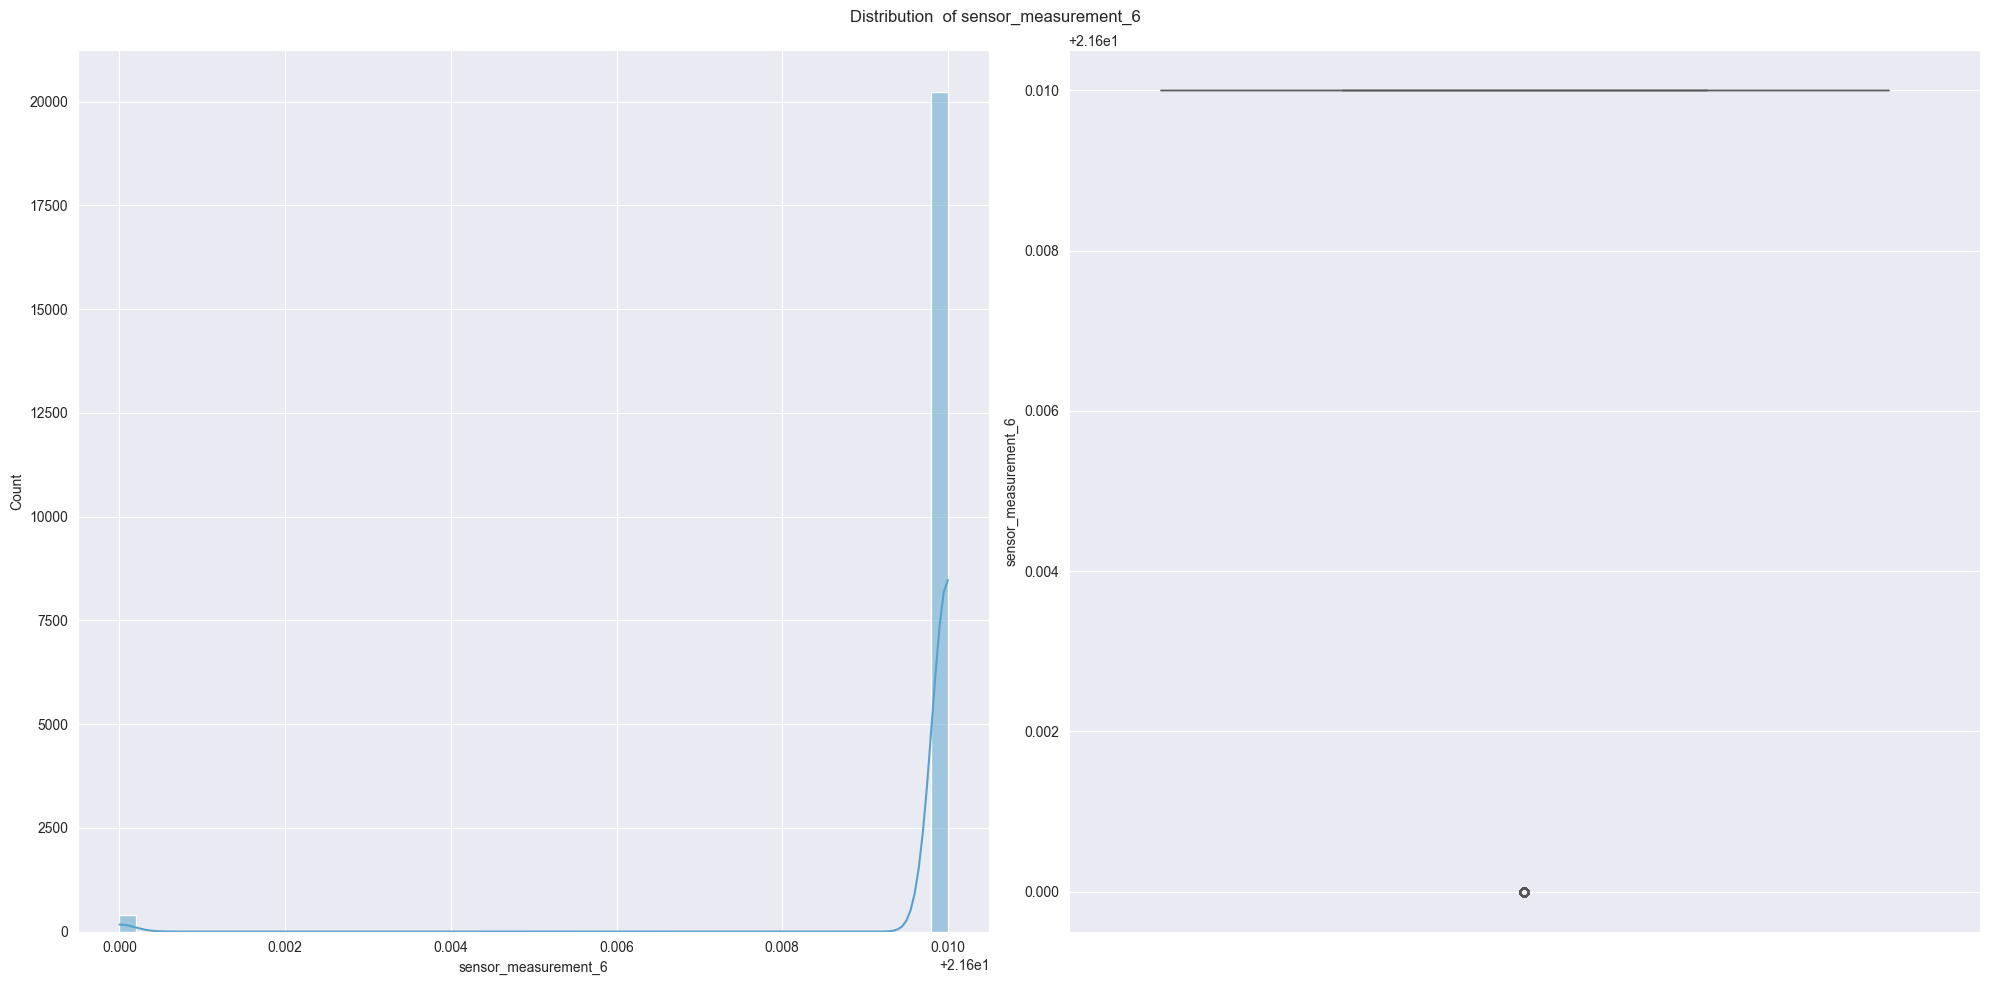

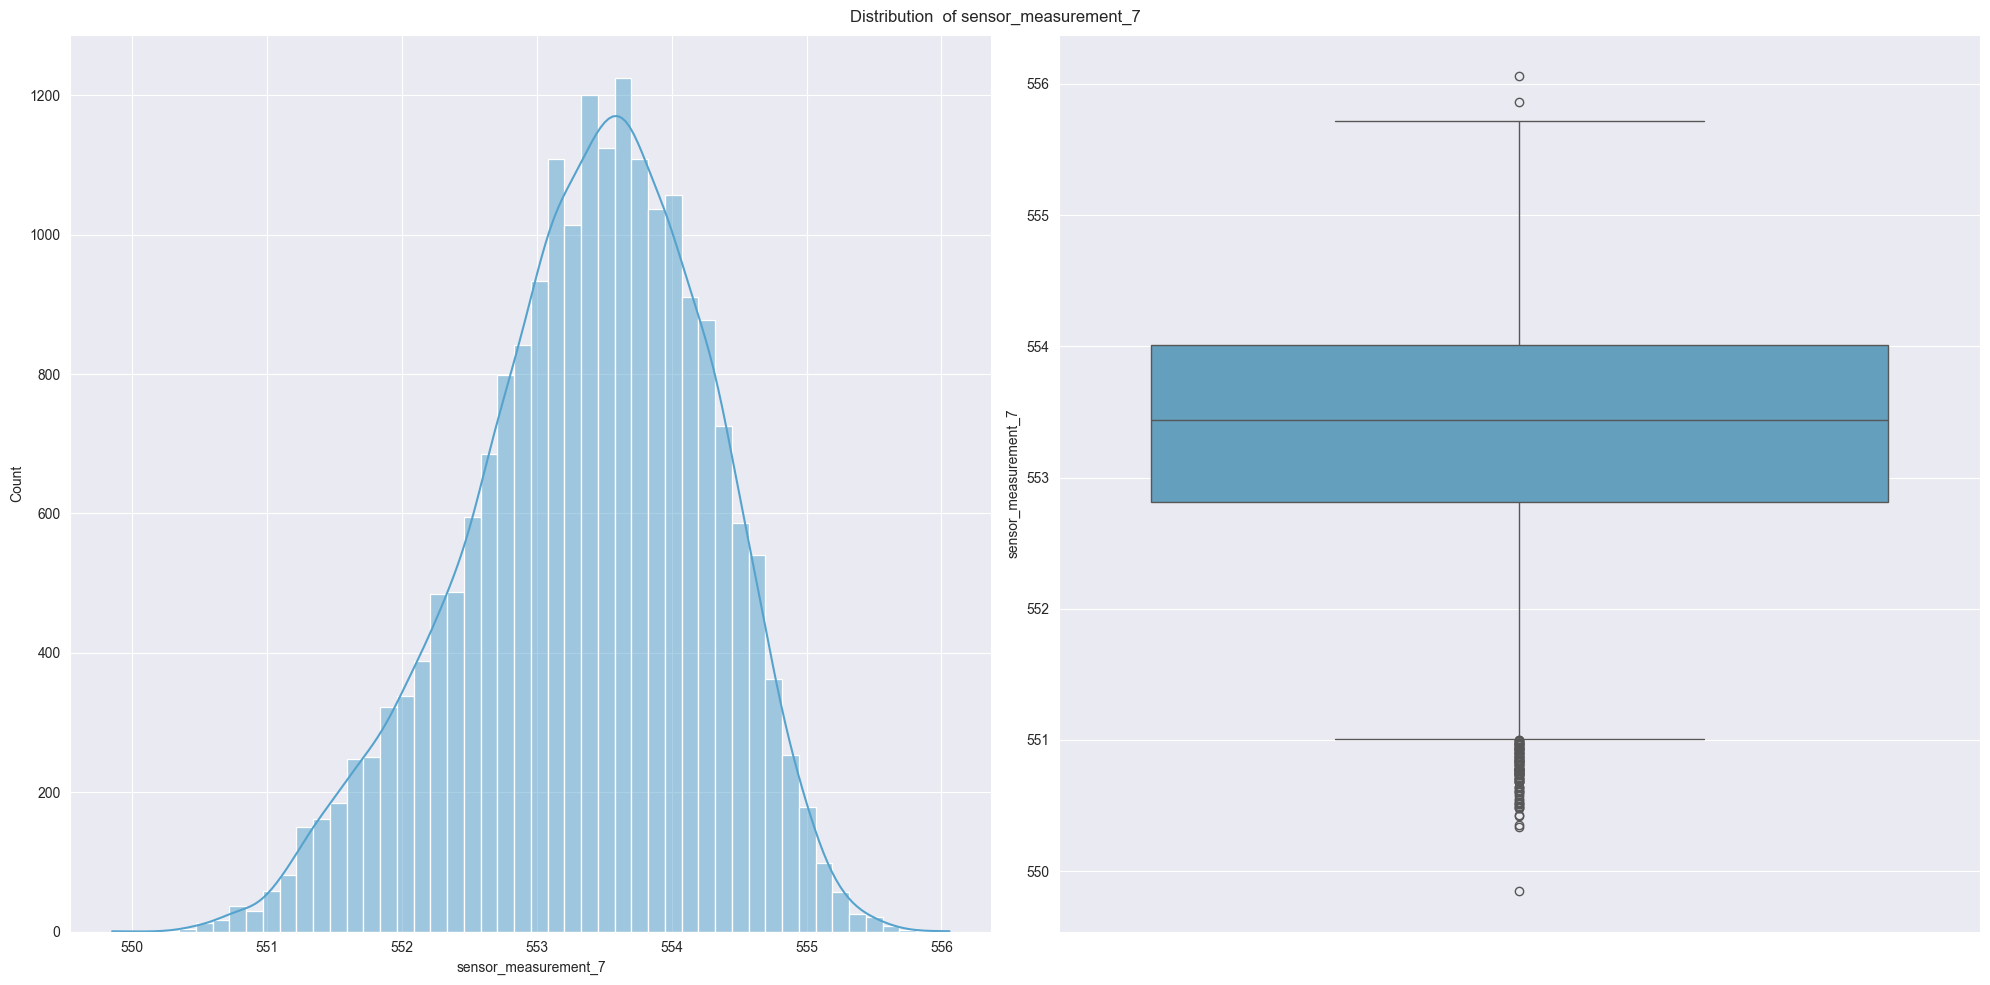

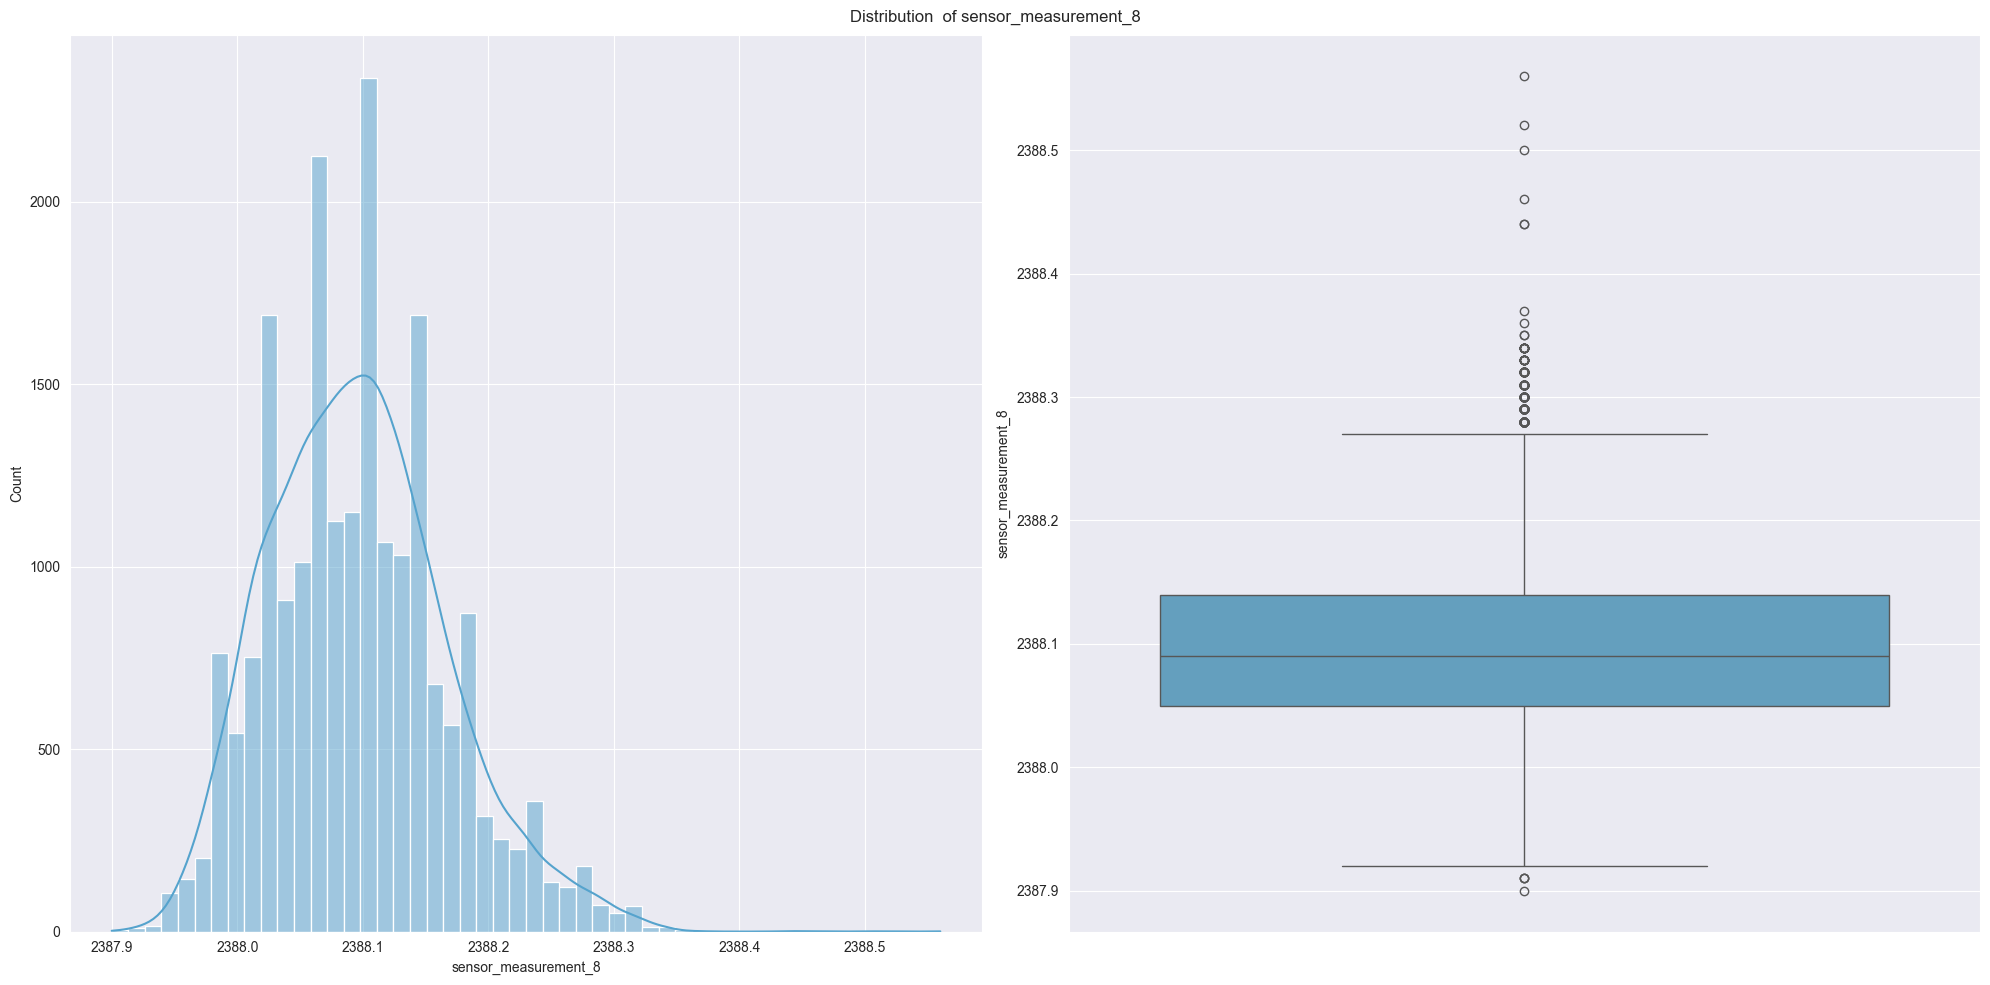

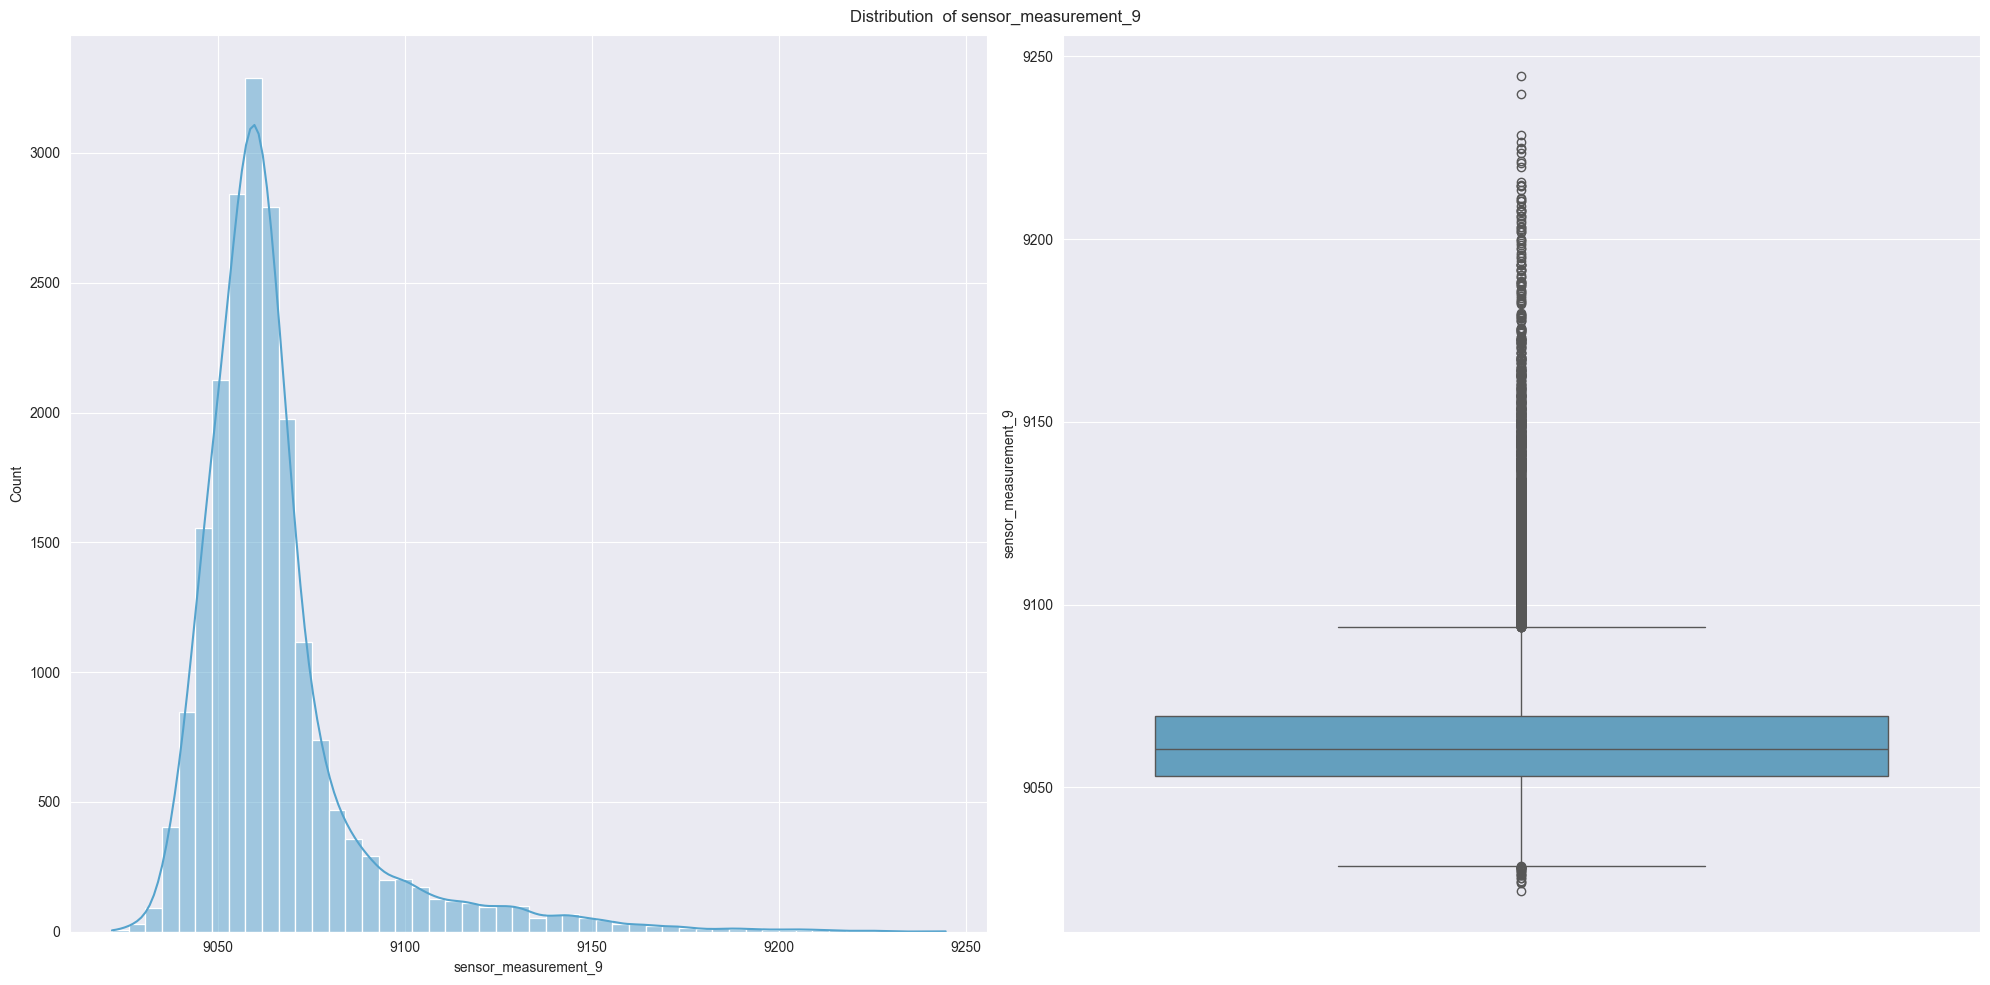

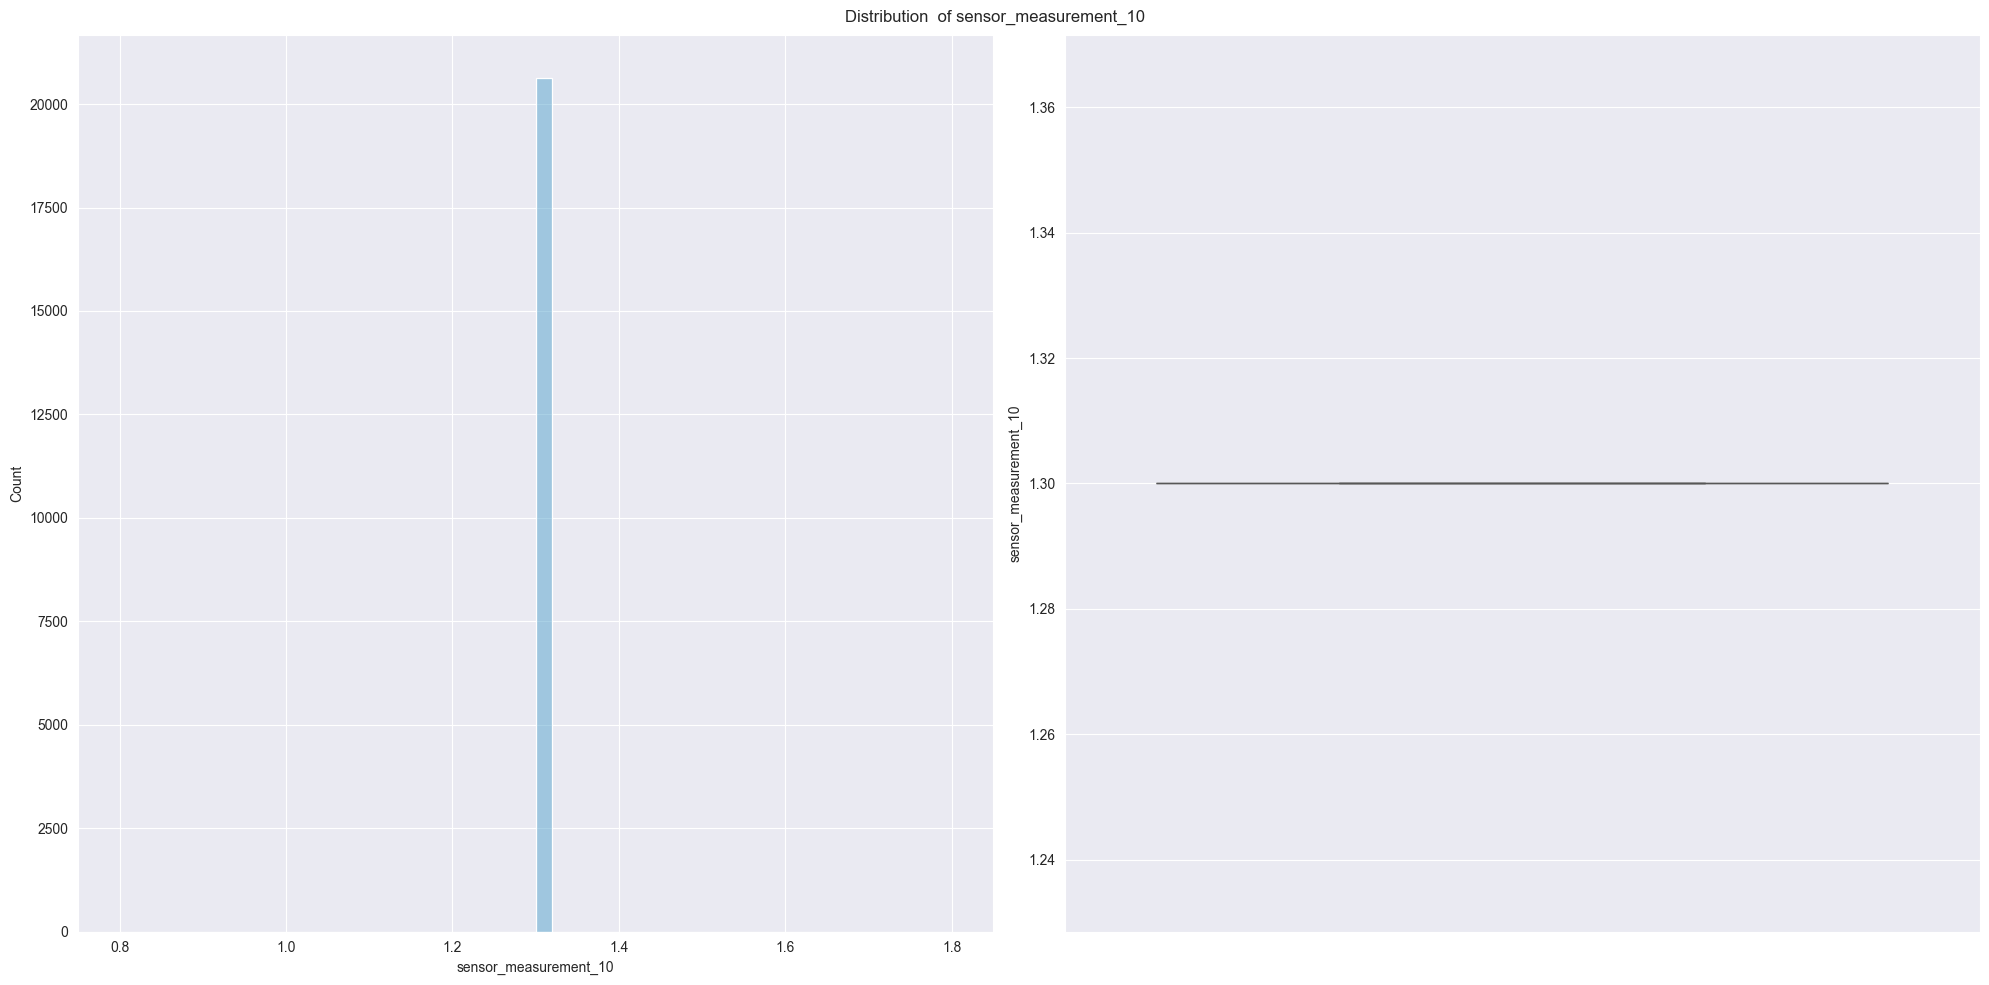

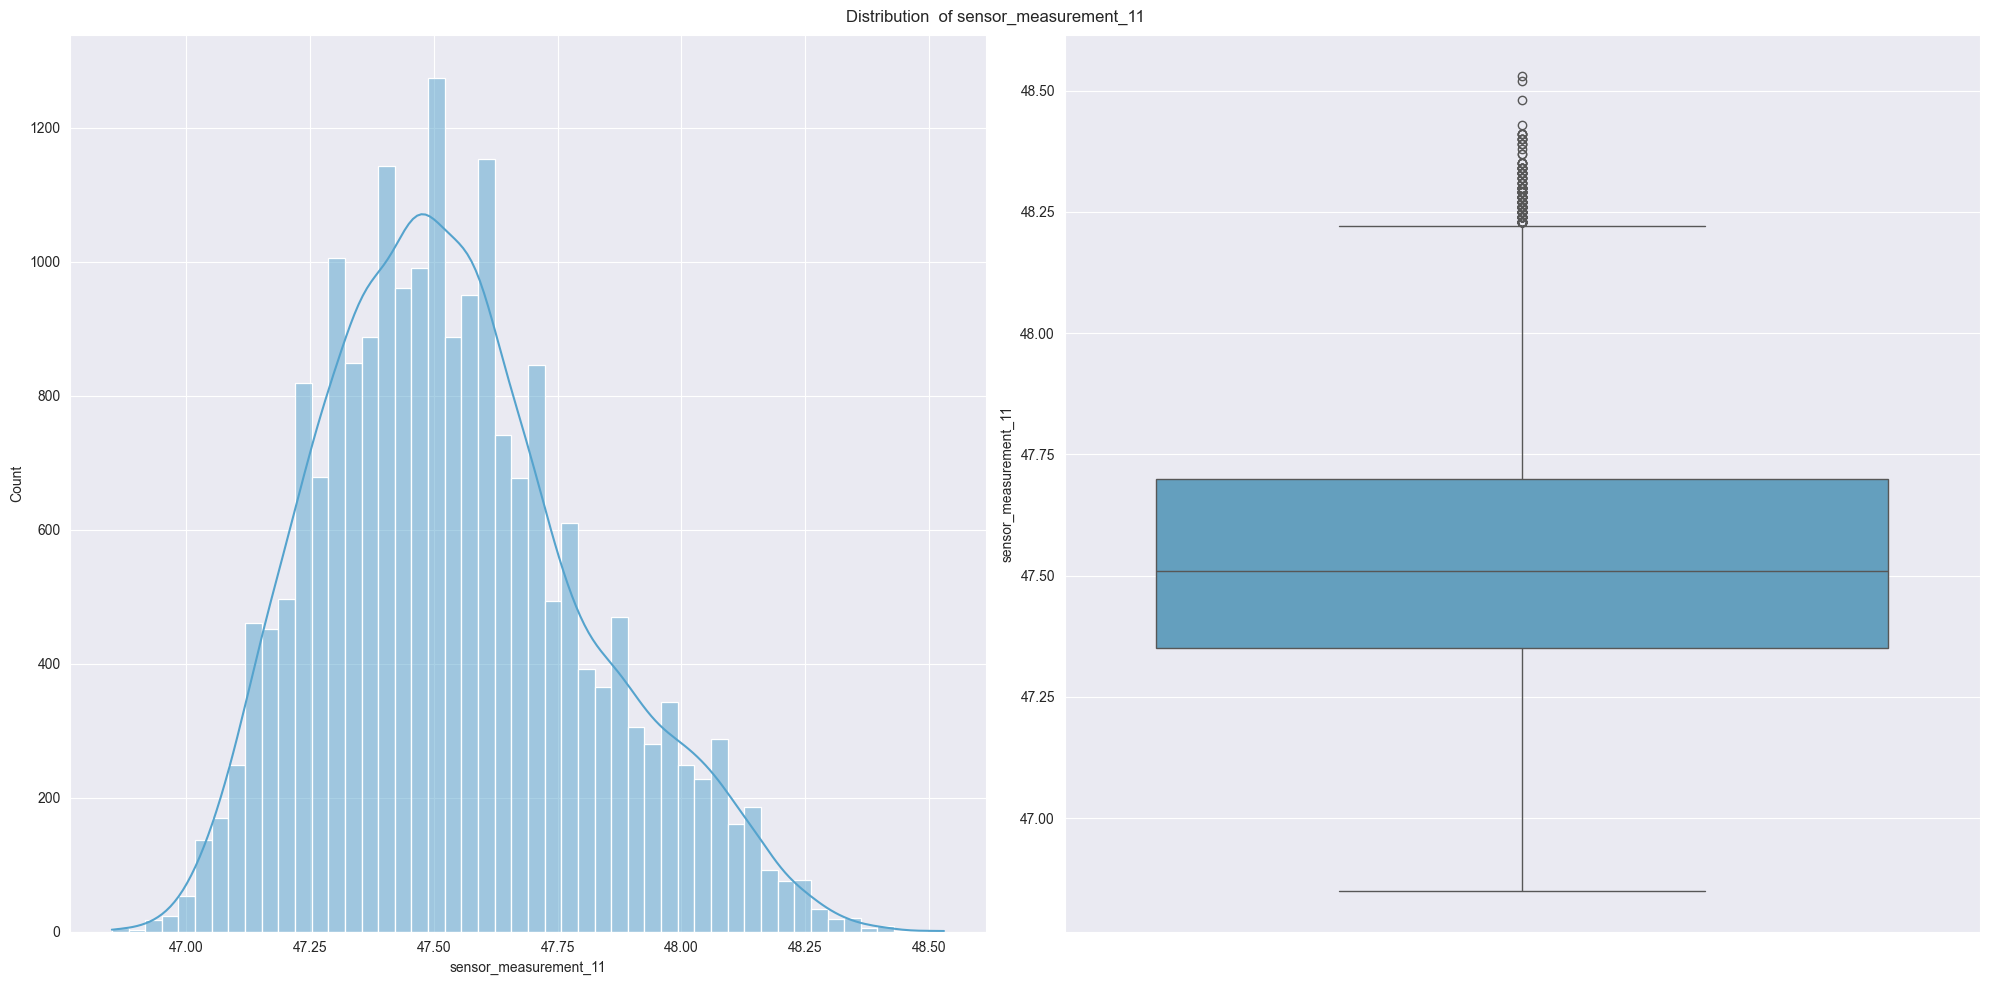

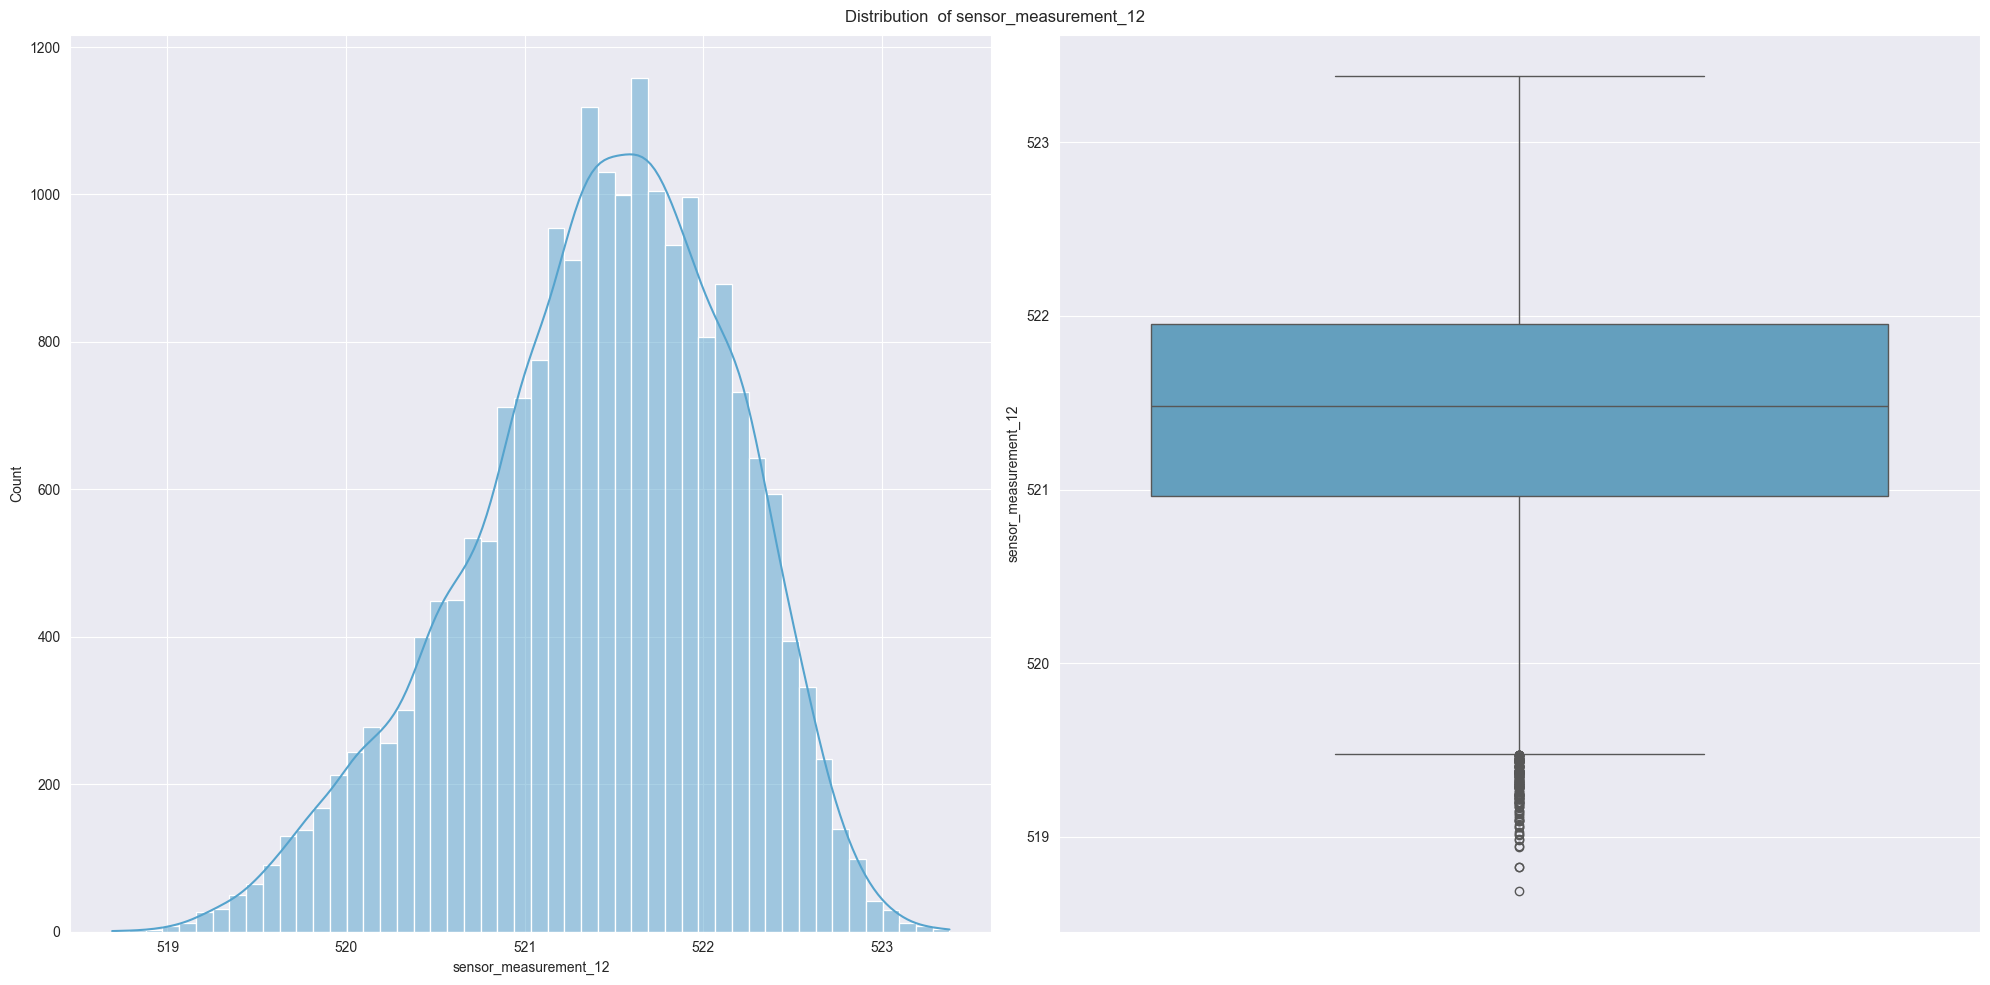

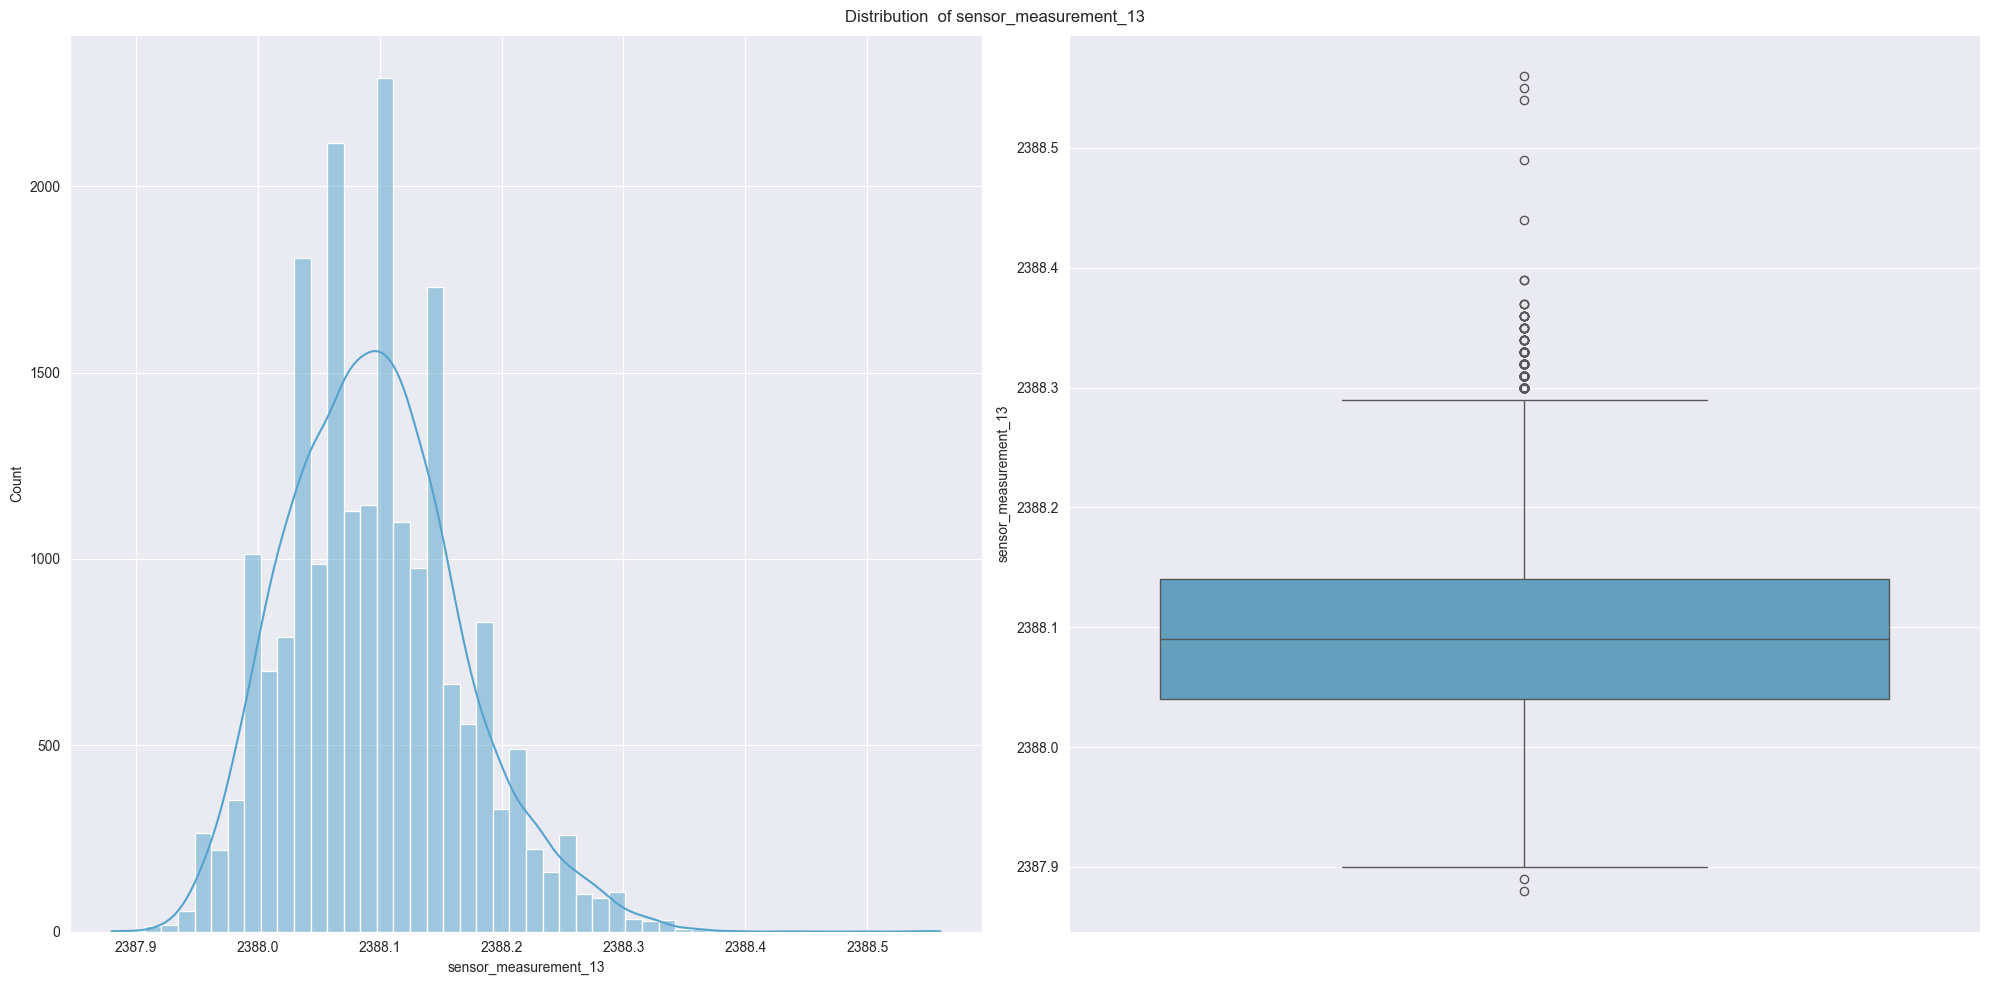

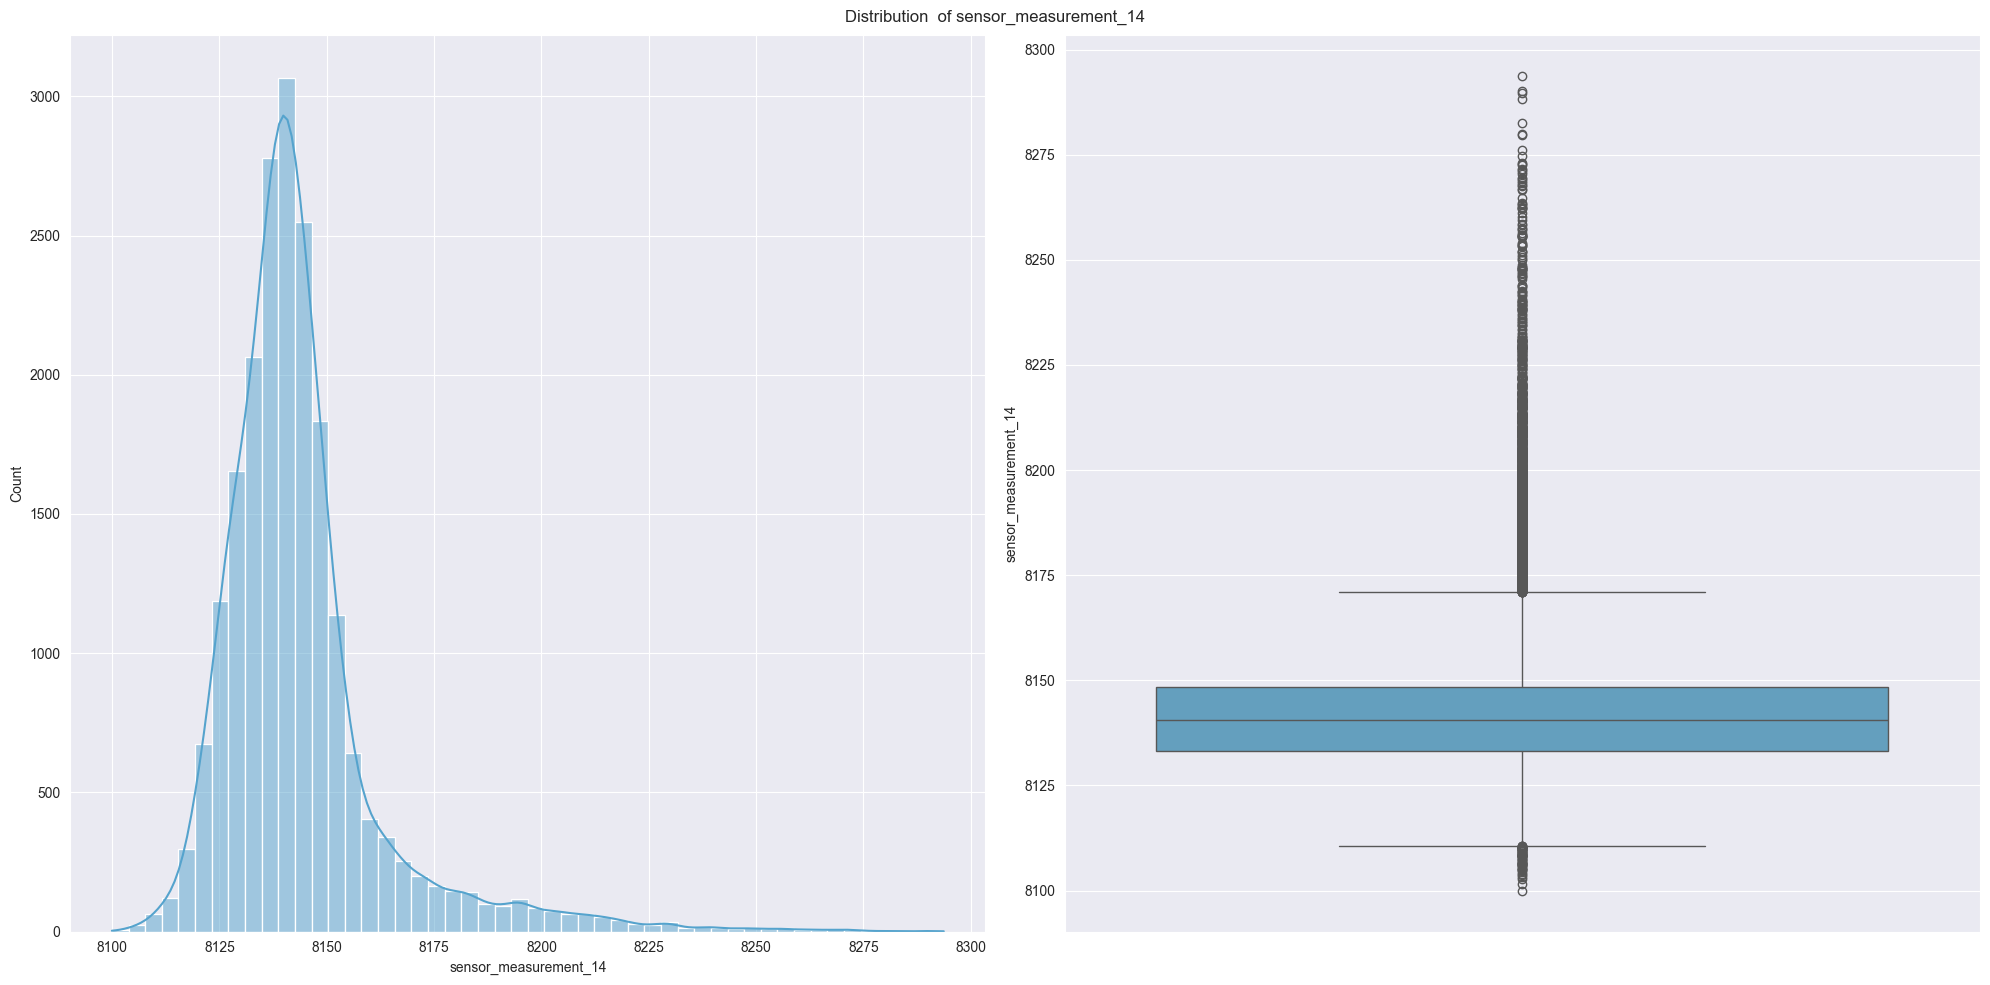

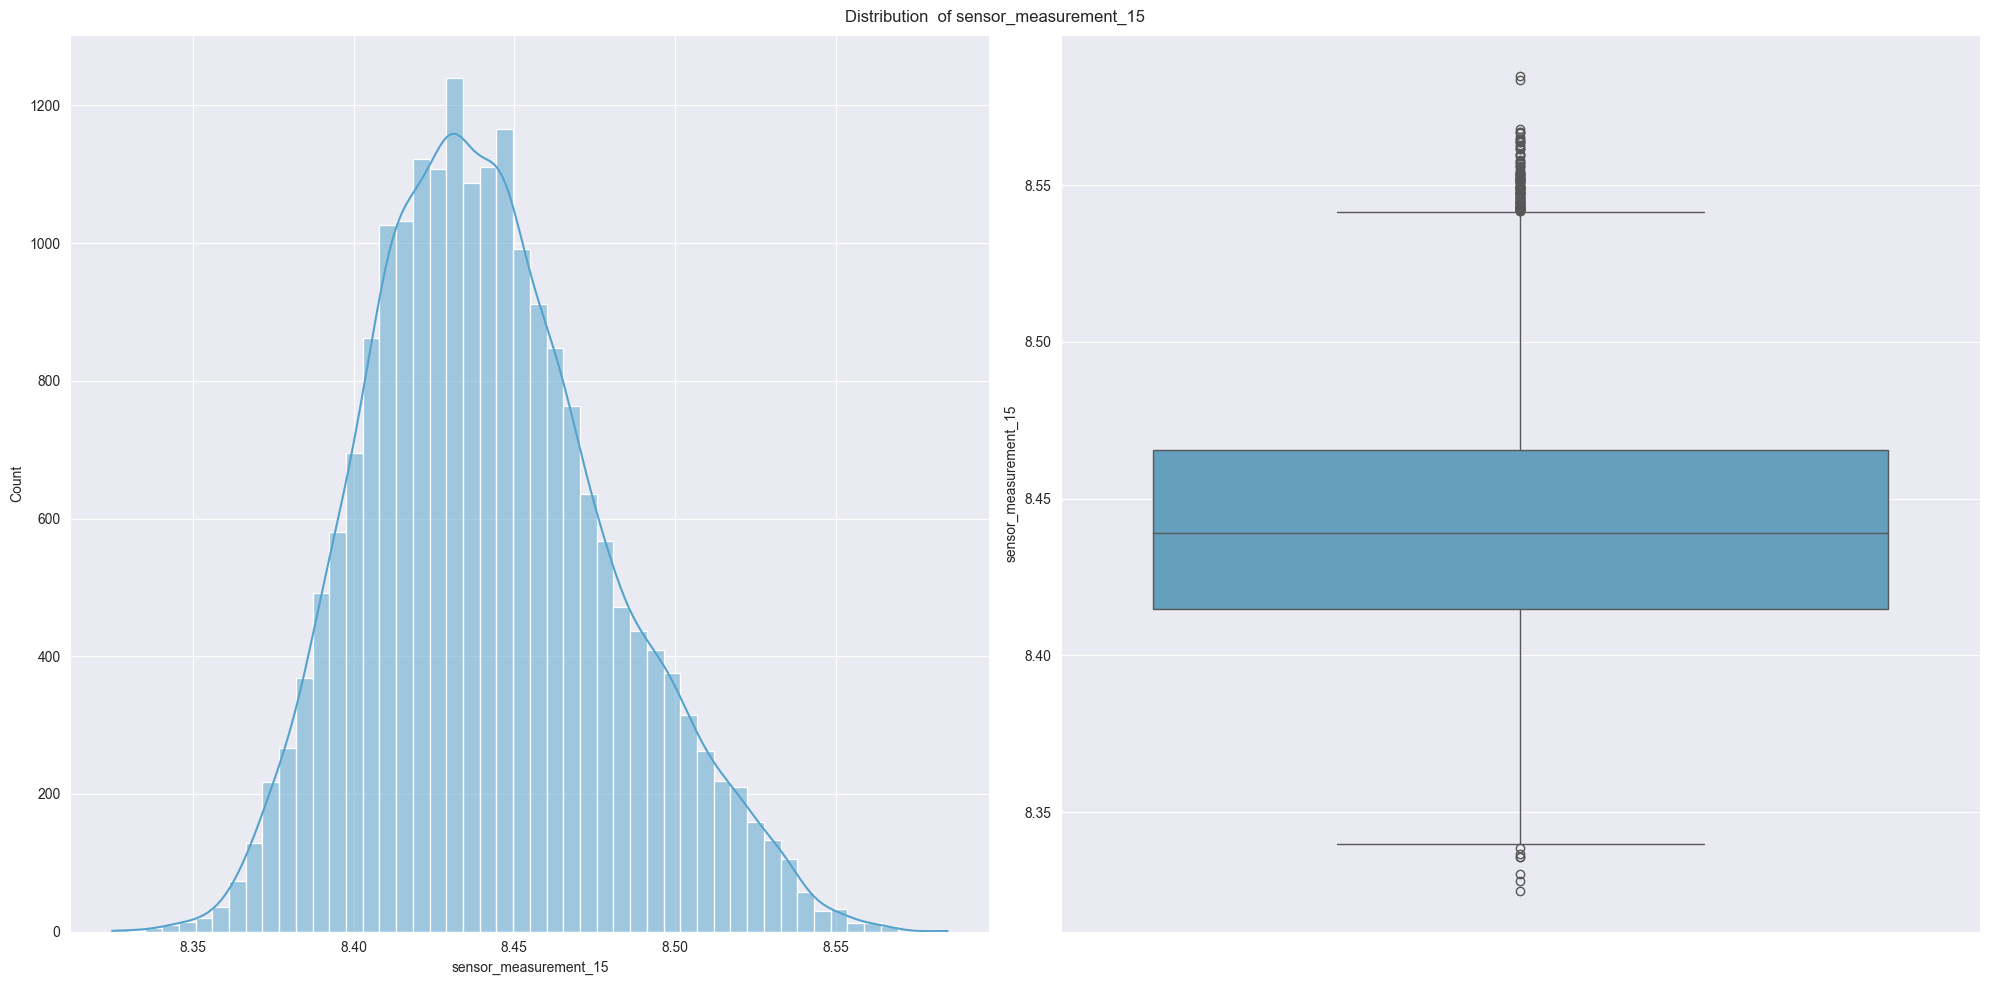

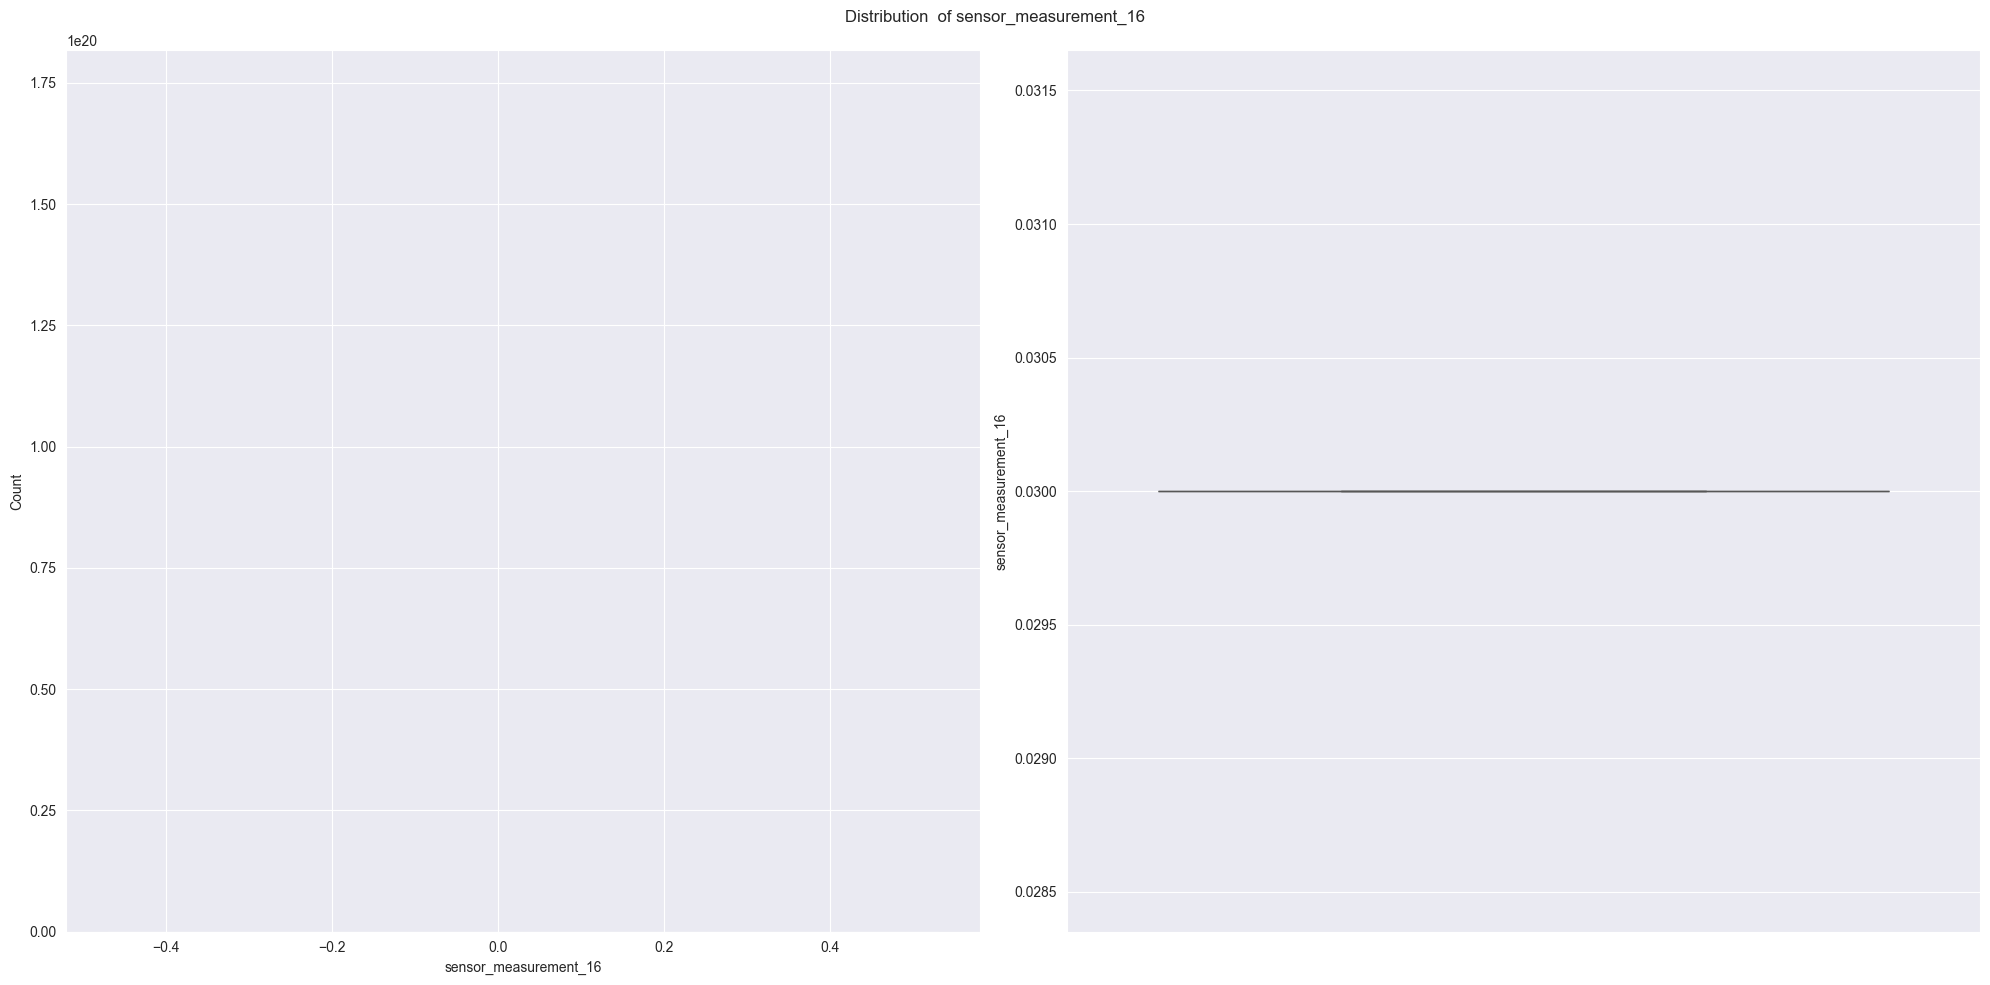

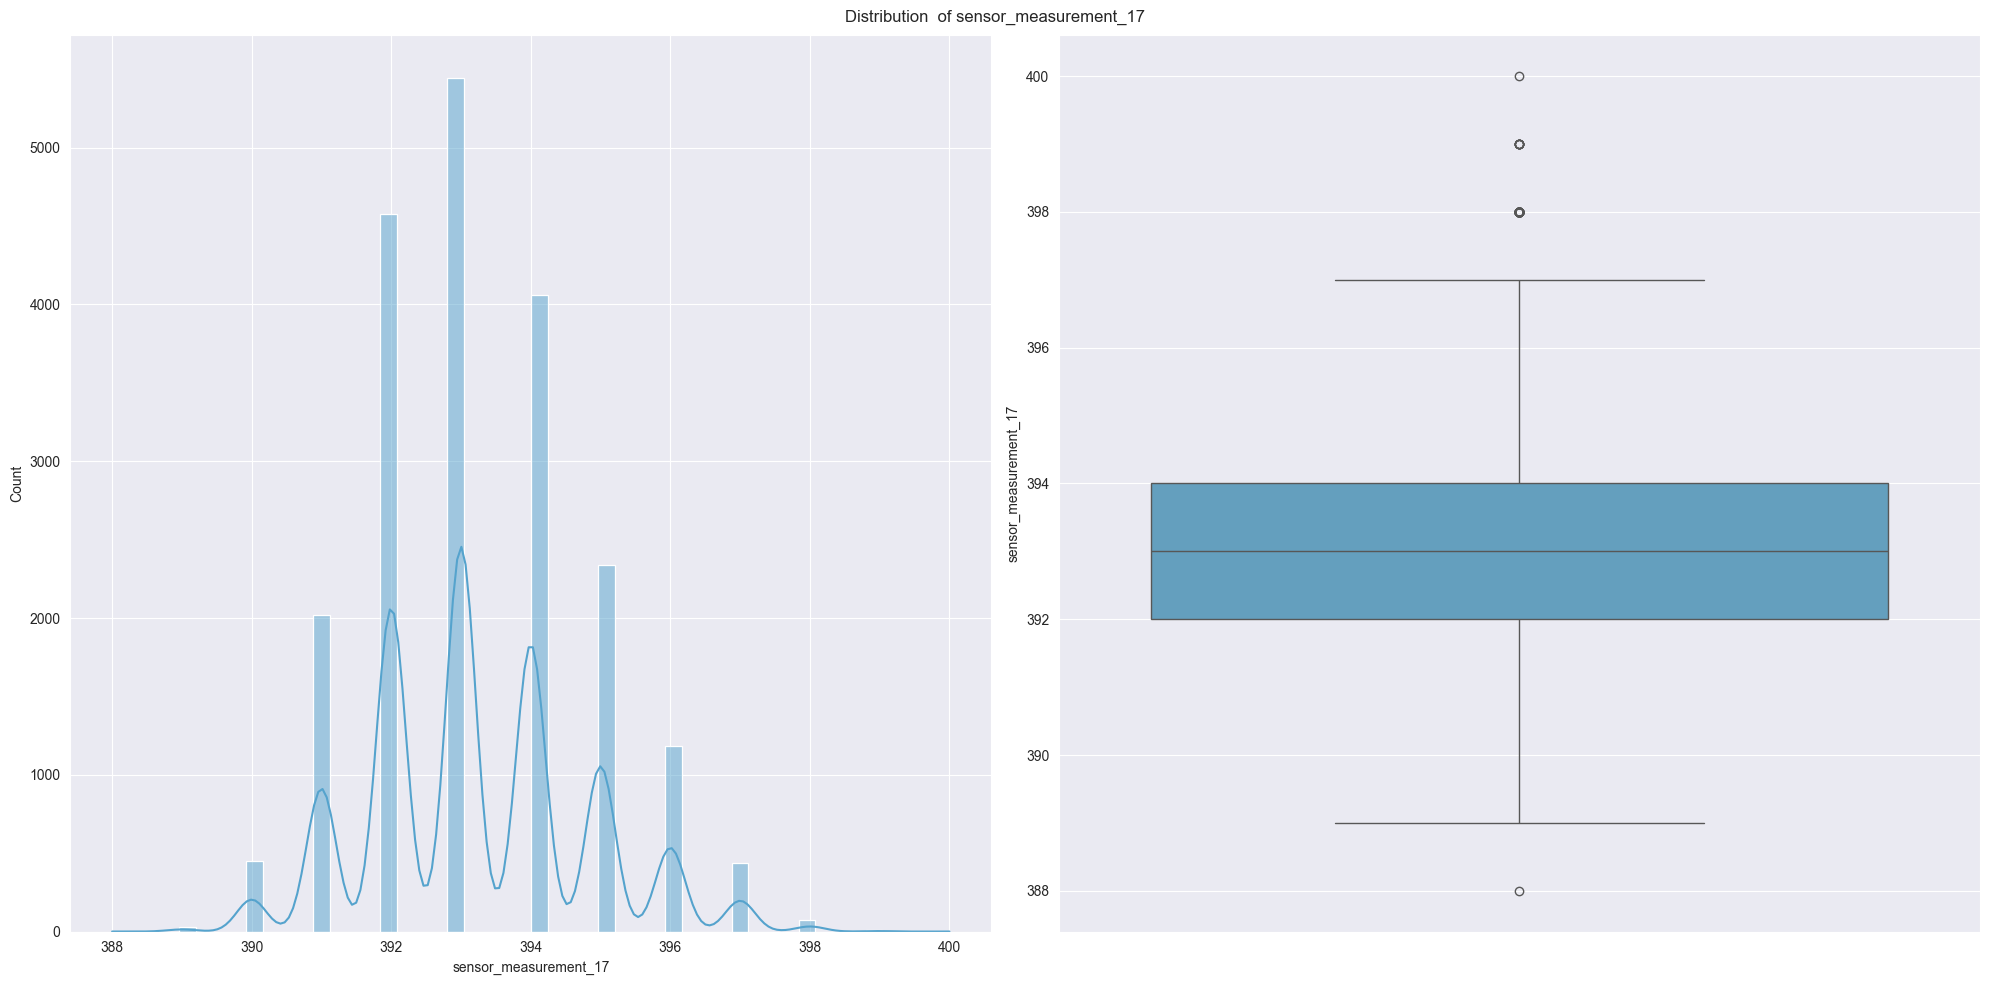

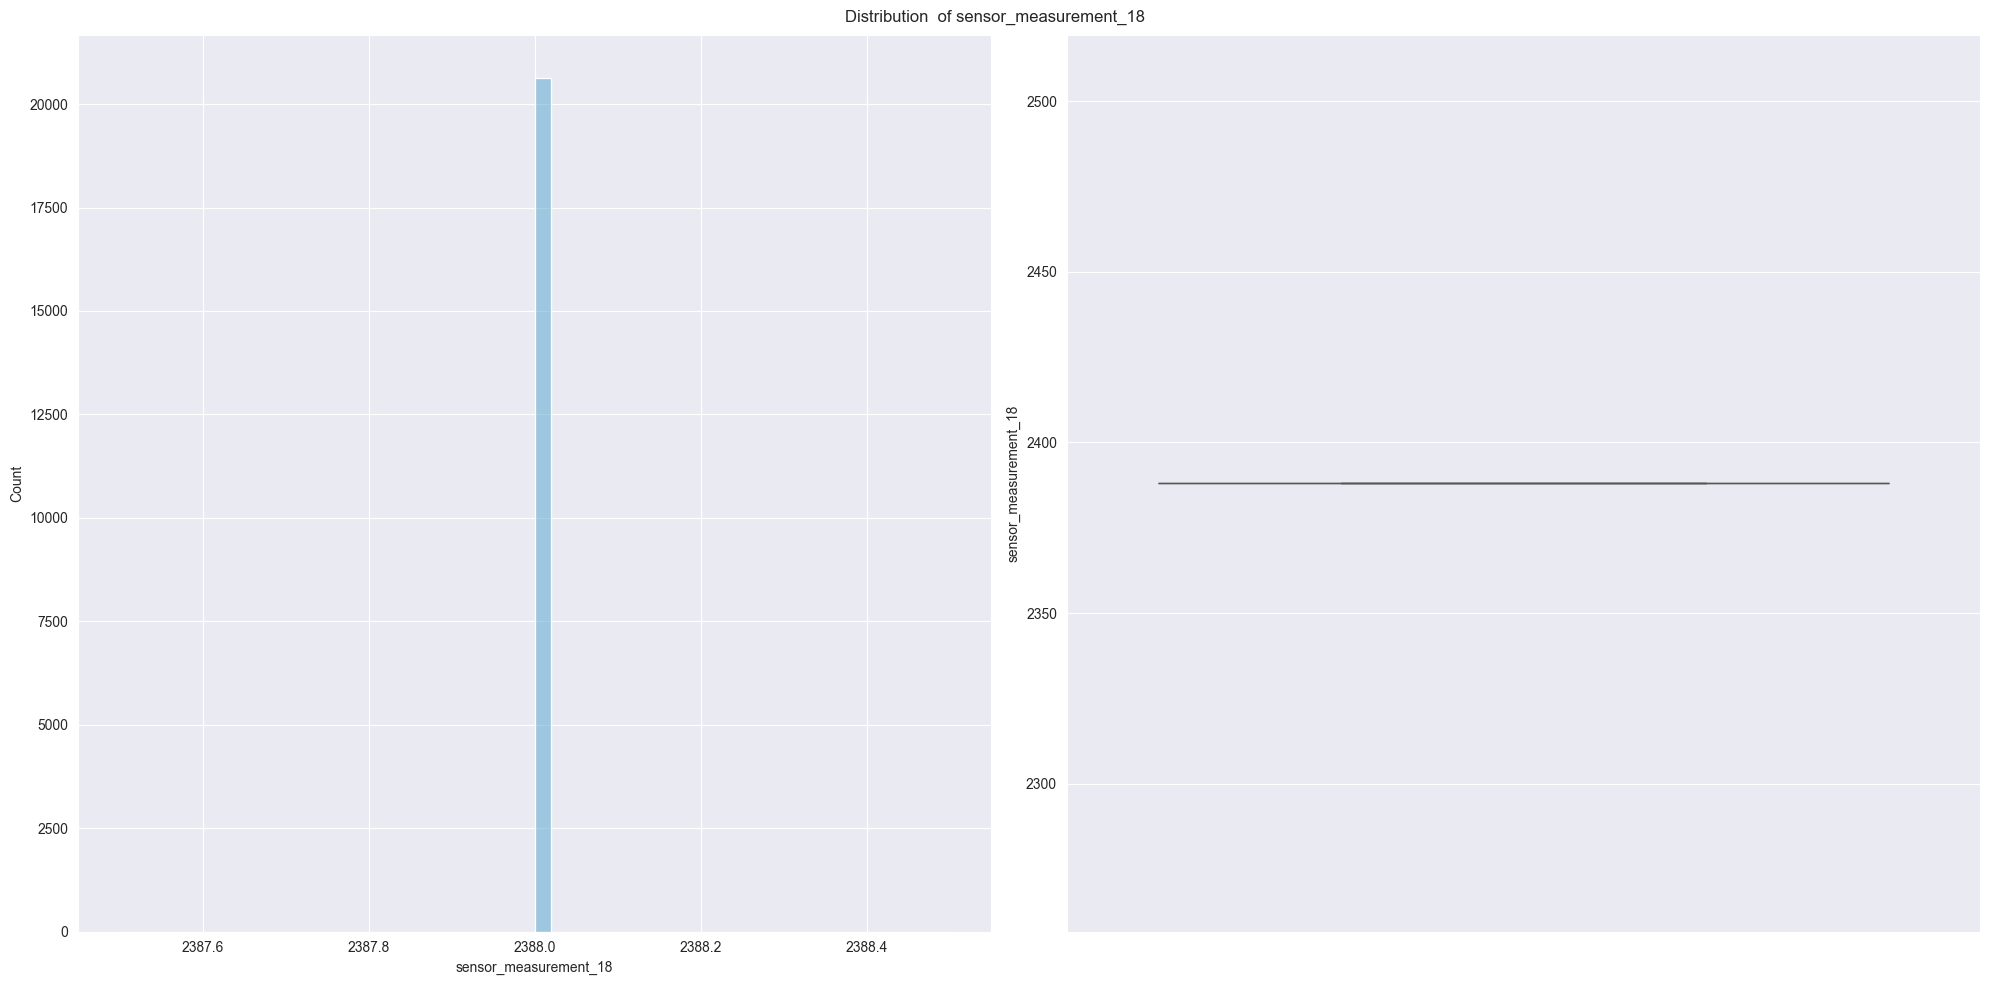

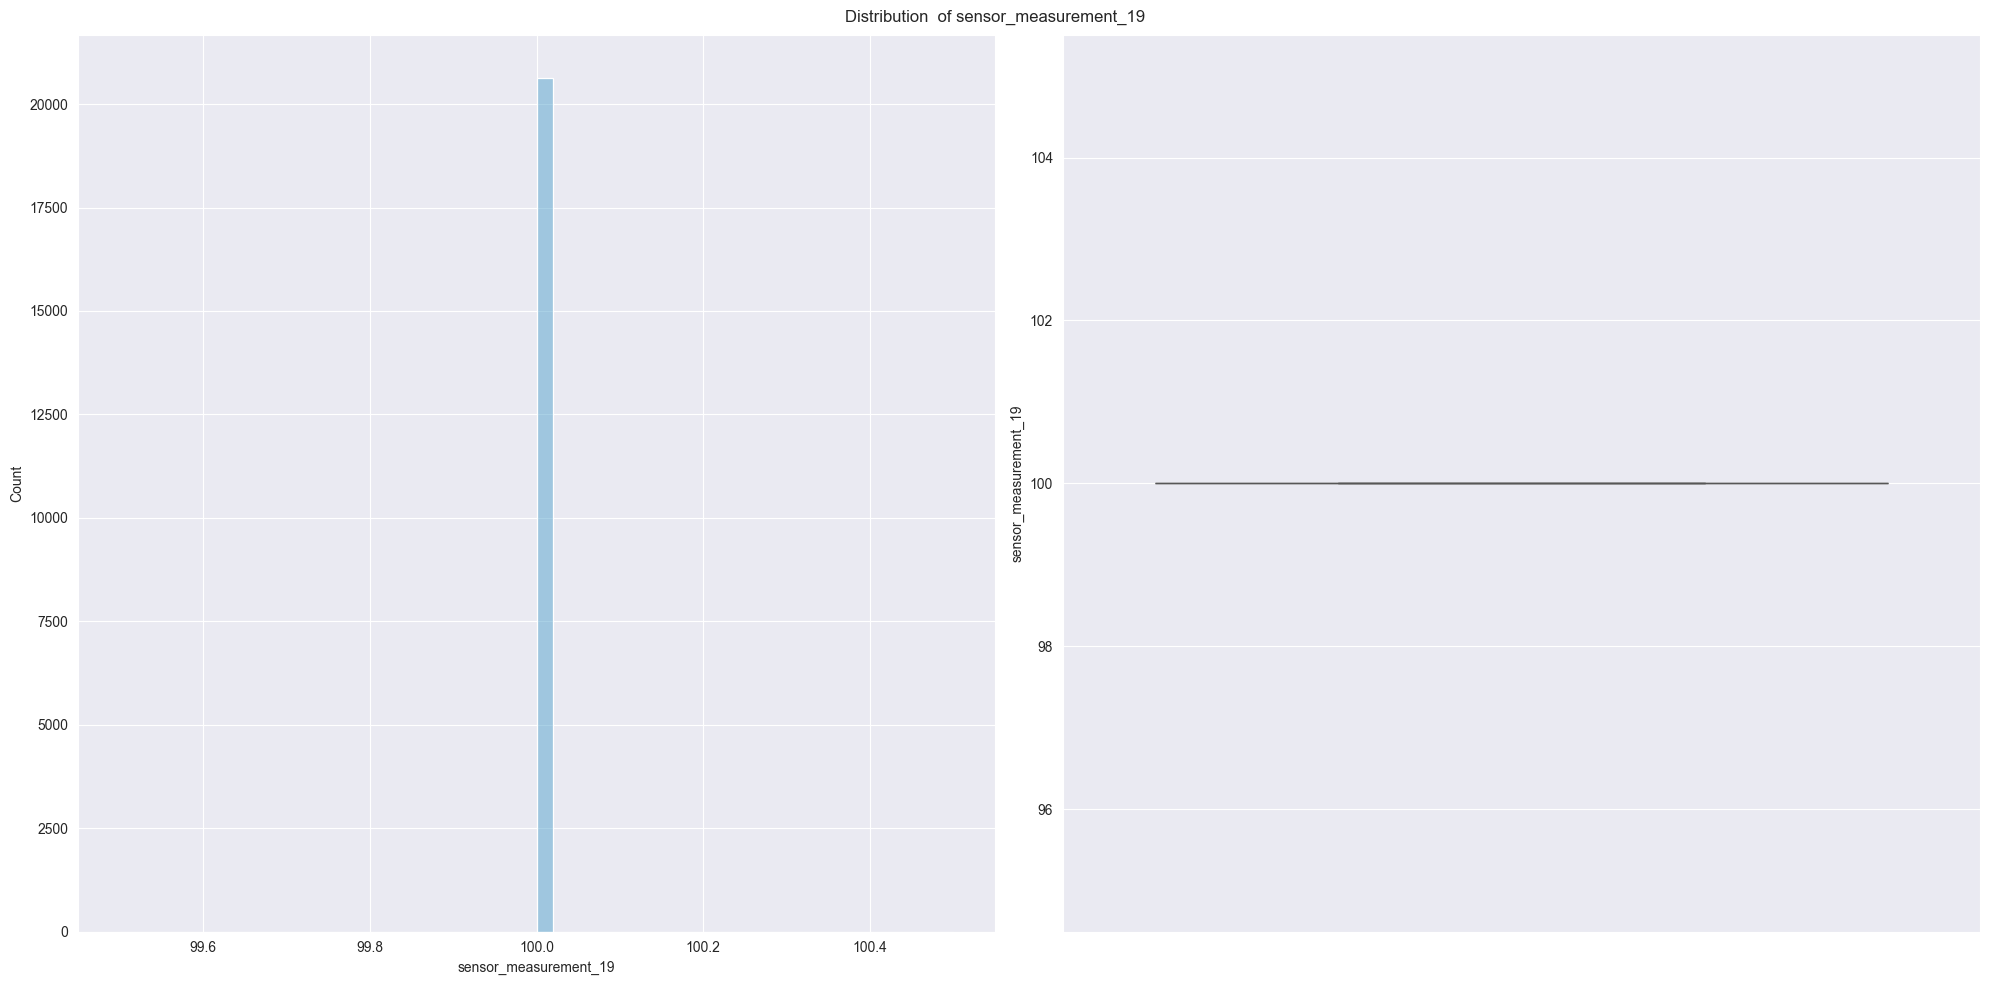

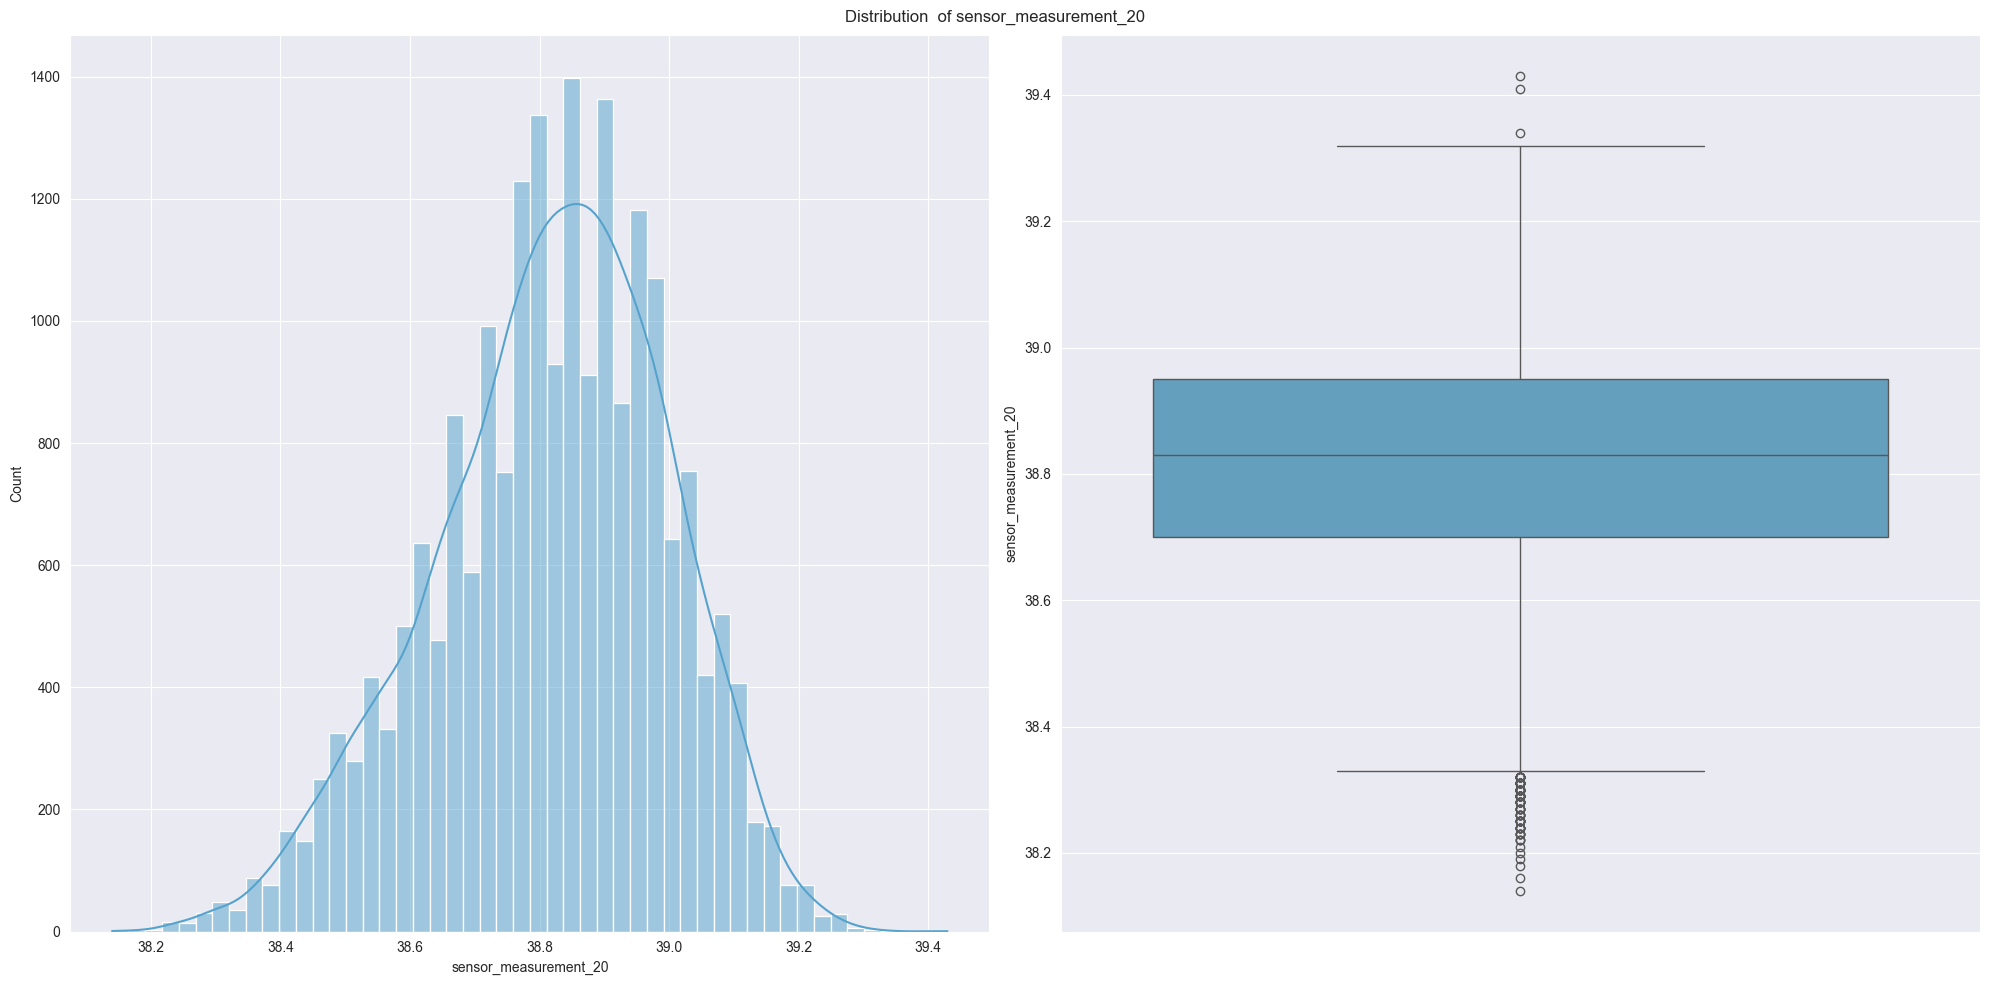

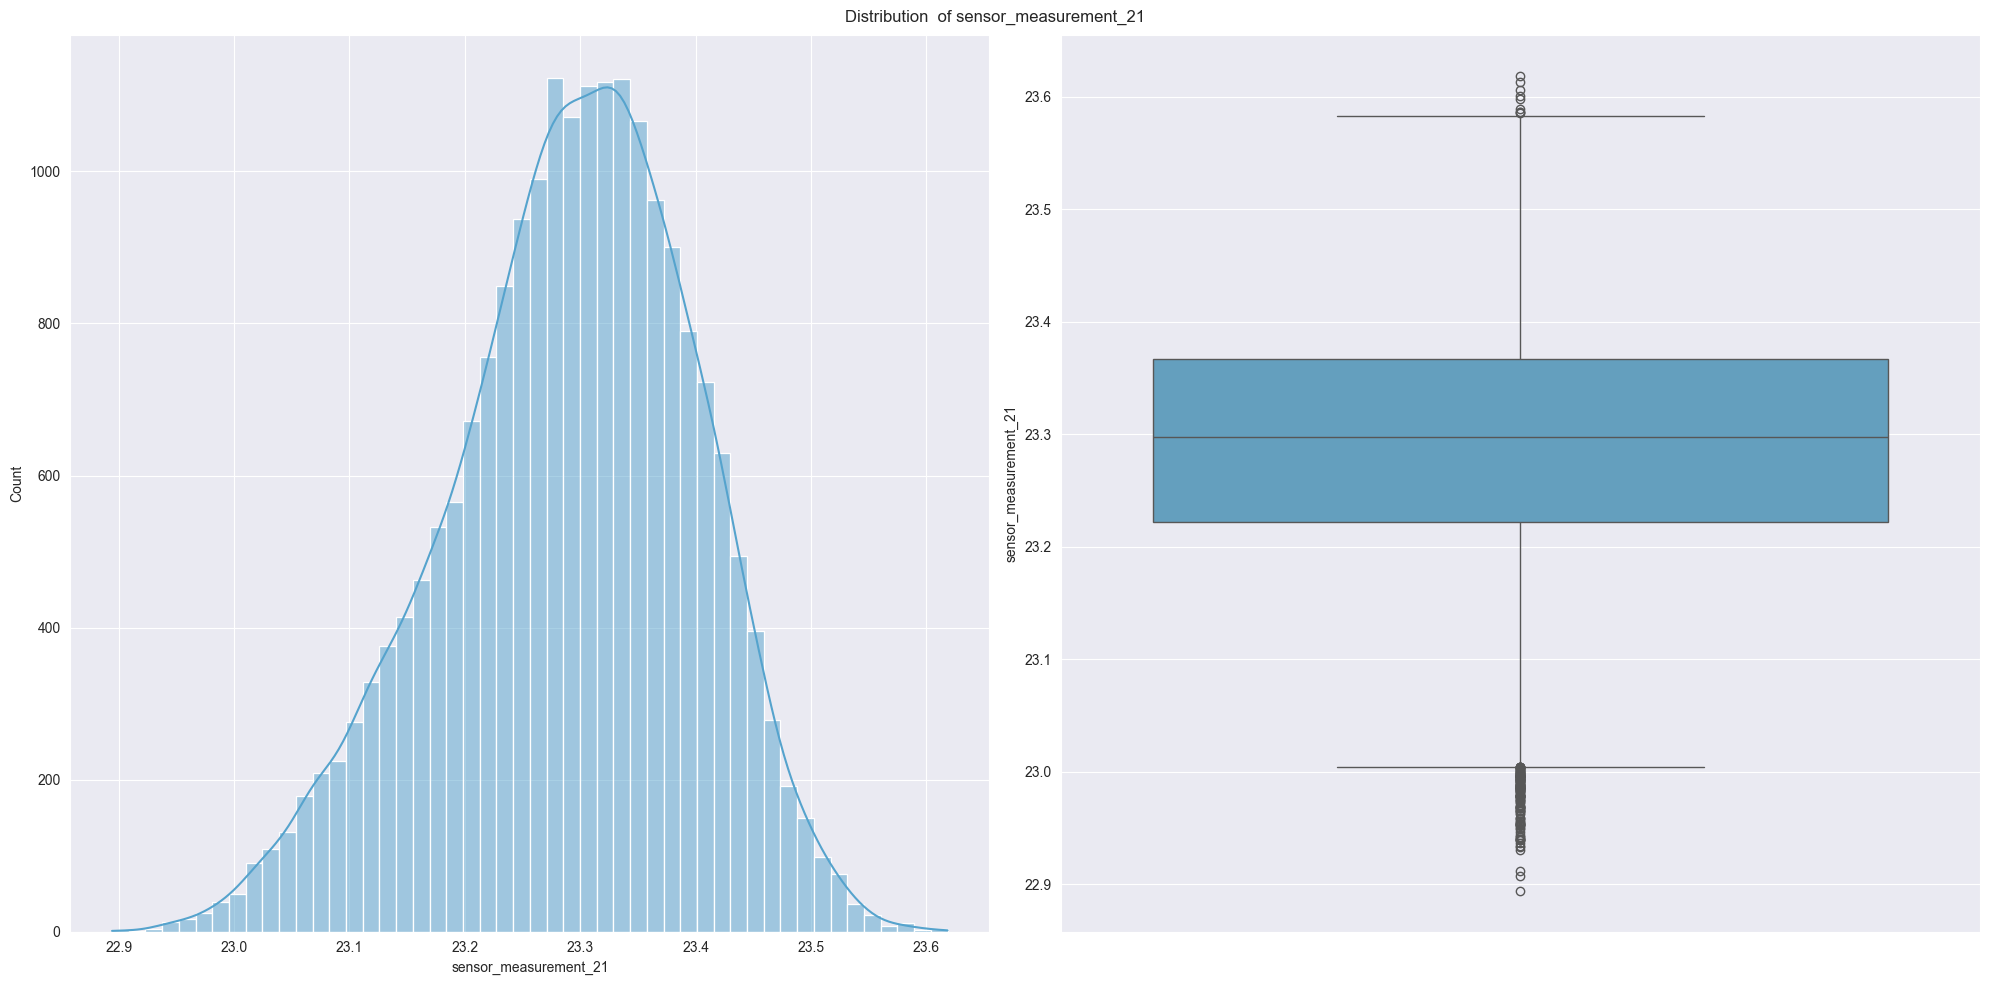

In [17]:
 # plotting the distributions of the sensors
sensor_col = train_df.iloc[:, 5:]

for col in sensor_col.columns:
    fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 10 ) )
    sns.histplot(sensor_col[col], kde=True, bins=50, ax = ax[0])
    sns.boxplot( sensor_col[col] , ax = ax[1])
    plt.suptitle(f'Distribution  of {col}')
    plt.tight_layout()
    plt.show()

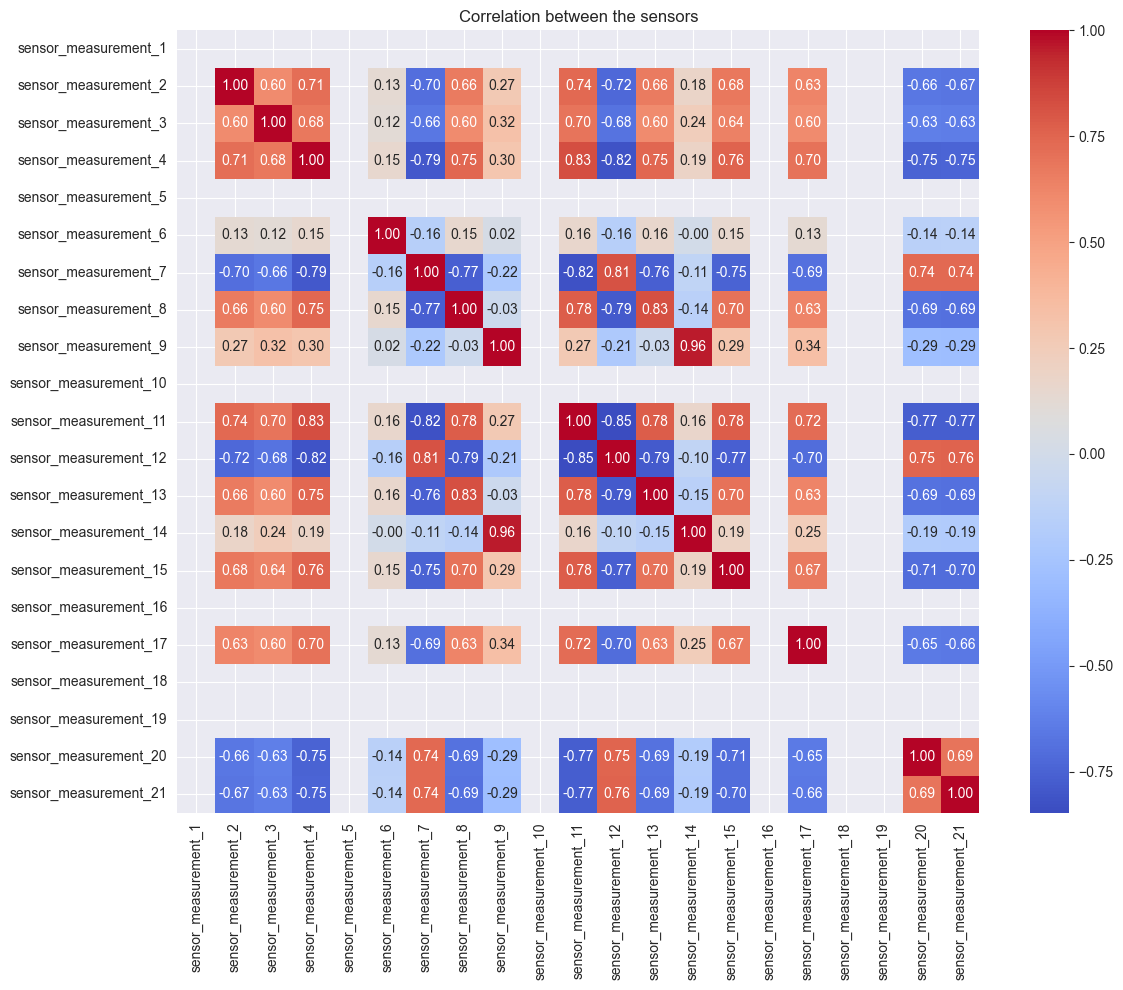

In [20]:
 # generating a heat map for correlation 
correlation = sensor_col.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between the sensors')
plt.tight_layout()
plt.show()
